In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일 읽어오기

In [3]:
human_seoul = pd.read_csv('human_seoul.csv')

In [4]:
market_seoul = pd.read_csv('market_seoul.csv')

# 가설 1 사람이 많은 지역이 상권이 많을 것이다

In [5]:
# human_seoul : 구 별로 인구 수 구하기
g_human_gu = human_seoul.groupby('시군구명').계.sum().to_frame()
g_human_gu = g_human_gu.sort_values(by='계',ascending=False)
g_human_gu.rename(columns={'계':'인구수'},inplace=True)

In [8]:
# market_seoul 컬럼 순서 변경
new_columns=['시도명','시군구명','행정동명','상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','표준산업분류명']

market_seoul=market_seoul.reindex(columns=new_columns)

In [9]:
# 시군구별로 상권수 구하기 
g_market_gu = market_seoul.groupby('시군구명').size().sort_values(ascending=False).to_frame()
g_market_gu.rename(columns={0:'상권수'},inplace=True)

In [10]:
# 정제된 2개의 데이터 합치기
g_market_gu.insert(0,'인구수',g_human_gu)

In [11]:
g_market_gu

,인구수,상권수
시군구명,,
강남구,534646,55953
서초구,404539,33742
송파구,657665,29691
마포구,365287,26223
영등포구,376423,25004
강서구,567883,23419
중구,121250,22359
종로구,140891,18558
관악구,487641,17412


In [12]:
# 한글지원
plt.rcParams['font.family'] = 'Malgun Gothic'

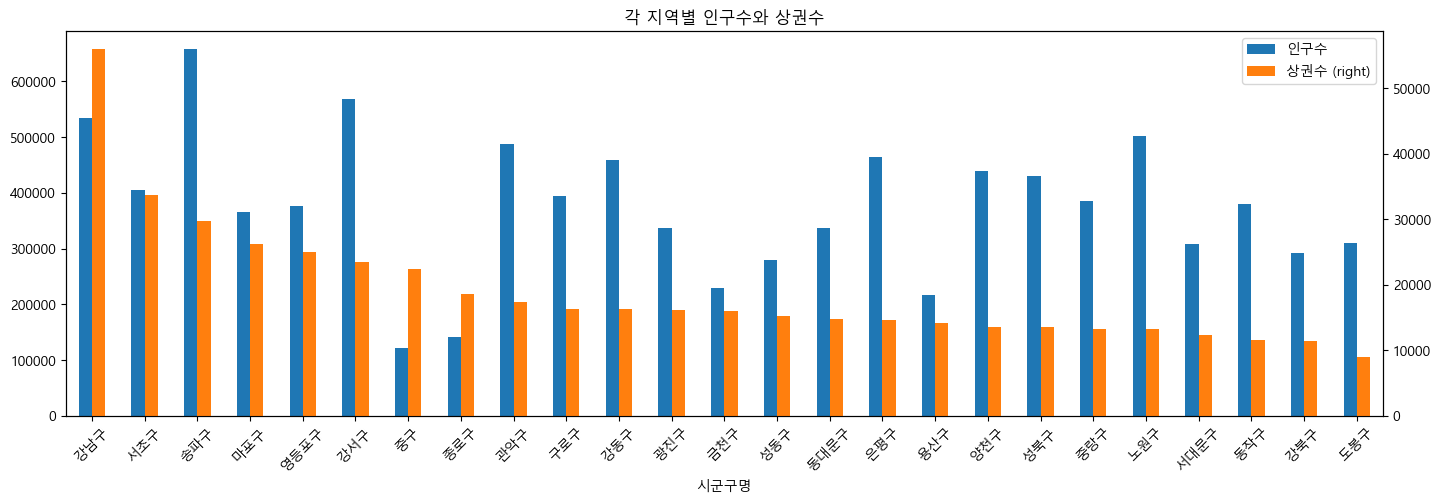

In [13]:
g_market_gu.plot(kind='bar',
                 figsize=(17,5),
                 rot=45,
                 title='각 지역별 인구수와 상권수',
                 secondary_y='상권수',
                )
plt.show()

- 서울지역 인구수는 송파구가 가장 많지만 상권수가 가장 많은 곳은 강남구이다
- 인구수가 가장 적은 곳은 중구지만 상권수가 가장 적은 곳은 도봉구이다
<br><br>
- 도봉구의 인구수가 중구에 비해 2배이상 많음에도 불구하고, 도봉구의 상권수가 중구에 비해 2배이상 낮다 
- 즉 인구수에 따른 상권수는 서로 상관관계가 없다

# 가설 2 인구에 따른 상권 분석 
- 인구가 가장 많은 송파구에는 음식점이 가장 많을 것이다
- 인구가 가장 적은 중구는 음식이 아닌 다른 상권이 더 많을 것이다

In [14]:
# 시군구명을 기준으로 그룹화
g_gu_big=market_seoul[['시군구명','상권업종대분류명']].groupby('시군구명').value_counts(normalize=True).unstack()

In [16]:
# 특수기호가 포함되어있는 컬럼 수정
g_gu_big.columns

Index(['과학·기술', '교육', '보건의료', '부동산', '소매', '수리·개인', '숙박', '시설관리·임대', '예술·스포츠',
       '음식'],
      dtype='object', name='상권업종대분류명')

In [17]:
g_gu_big.rename(columns={'과학·기술': '과학.기술', '수리·개인': '수리.개인', '시설관리·임대': '시설관리.임대', '예술·스포츠': '예술.스포츠'},inplace=True)

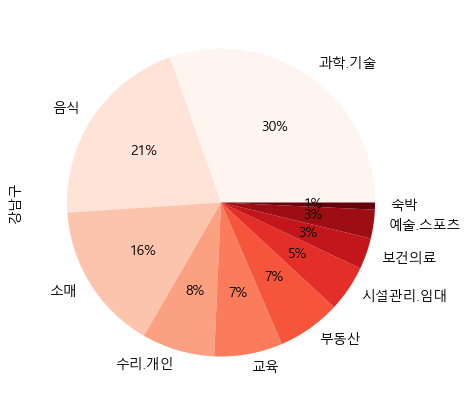

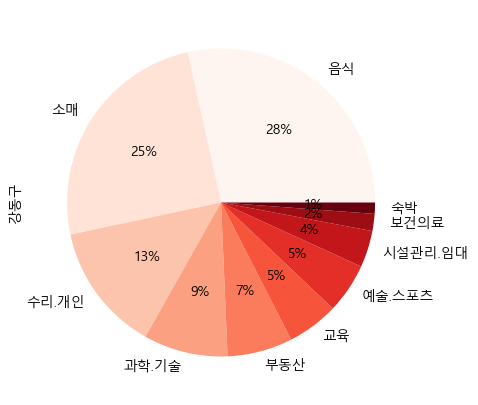

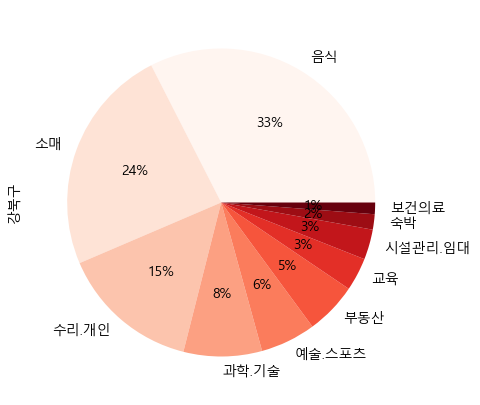

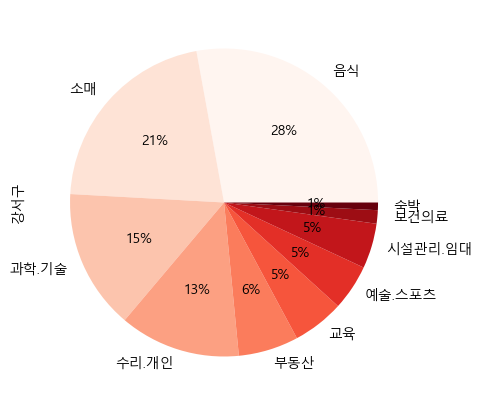

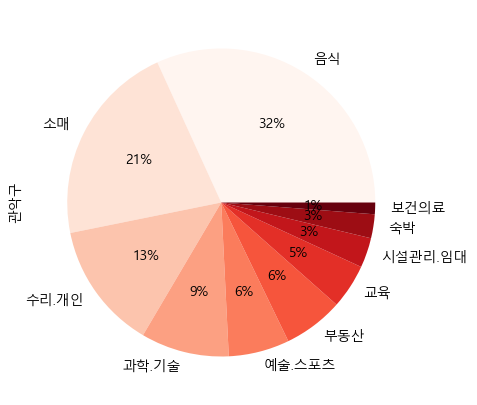

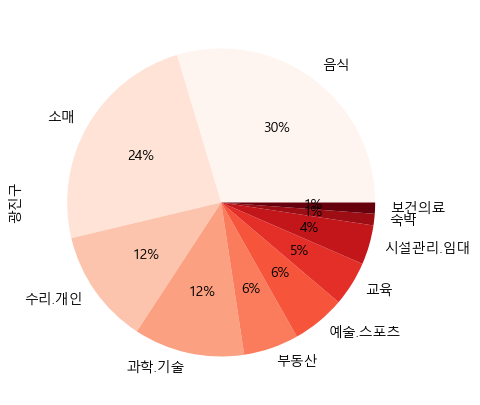

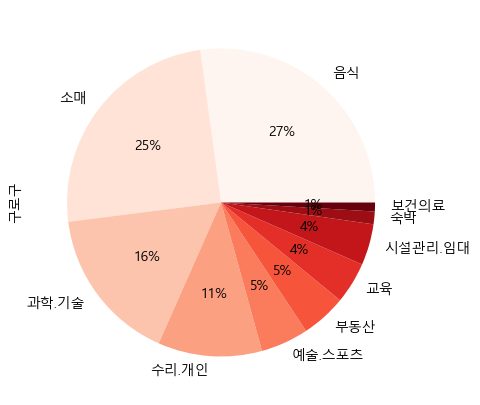

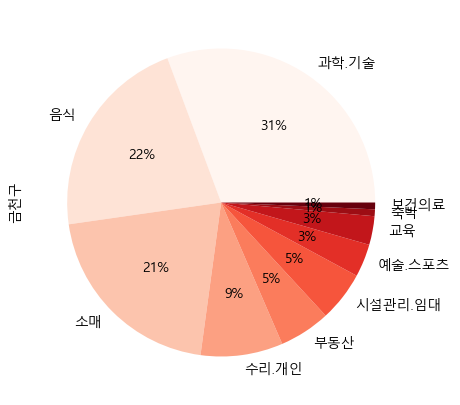

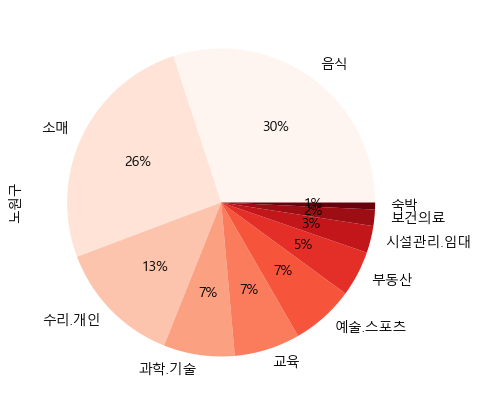

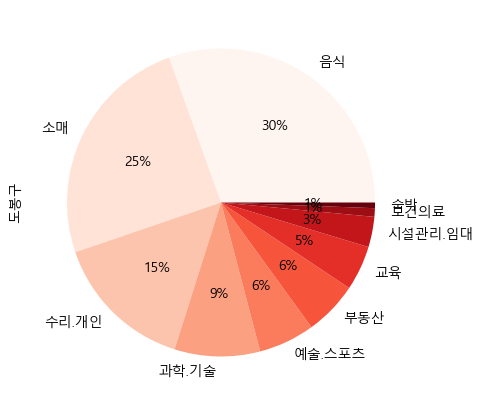

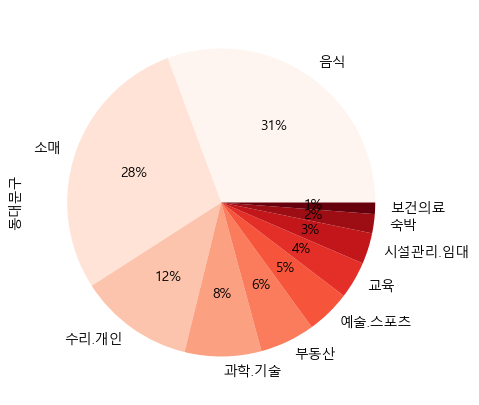

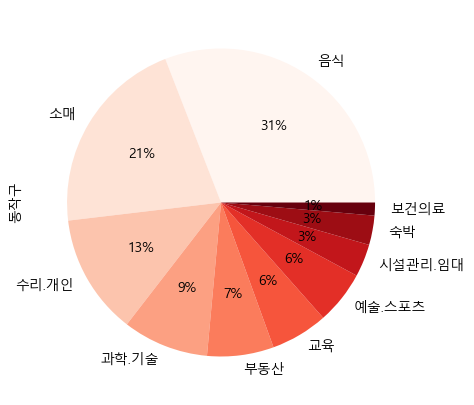

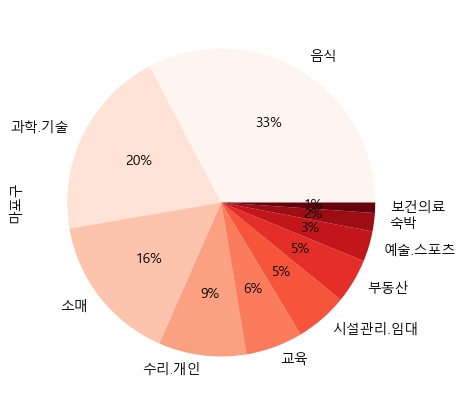

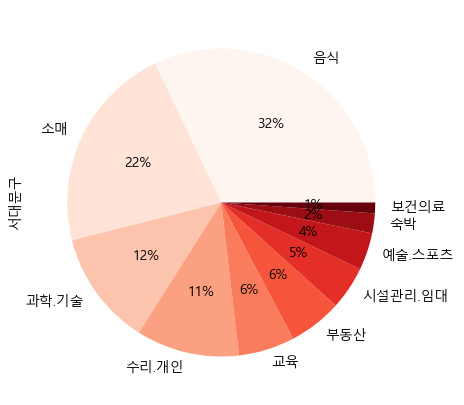

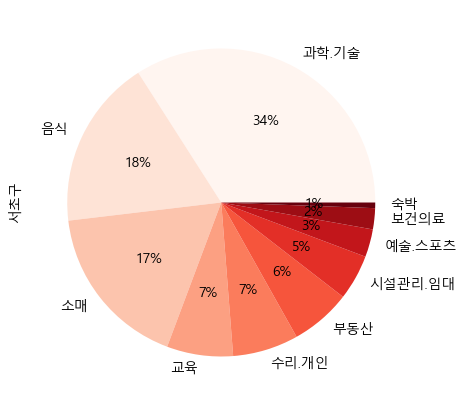

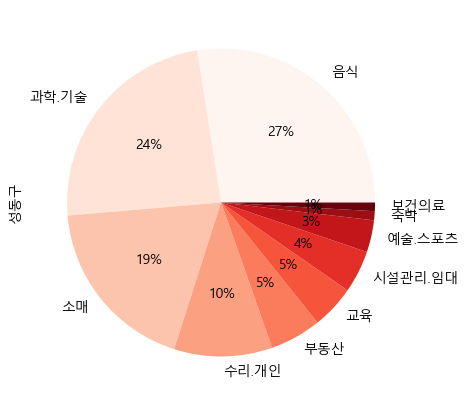

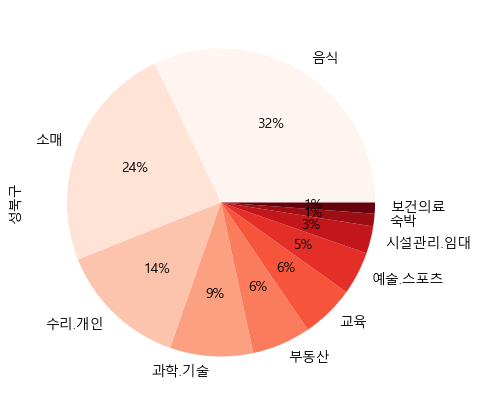

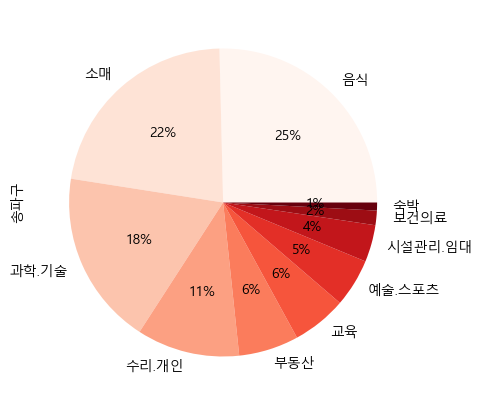

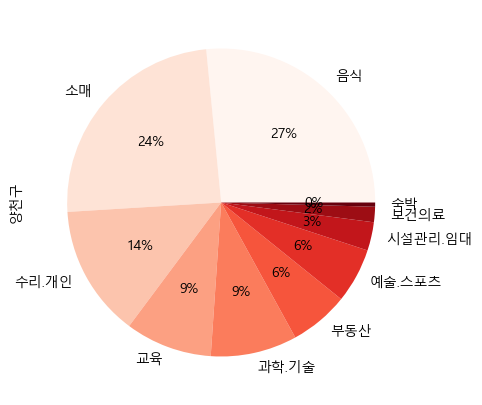

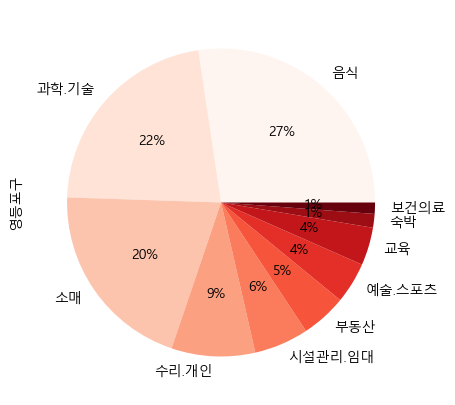

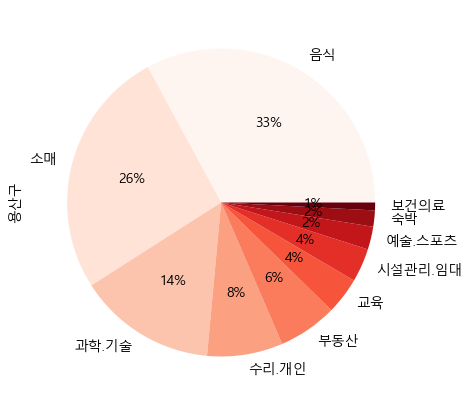

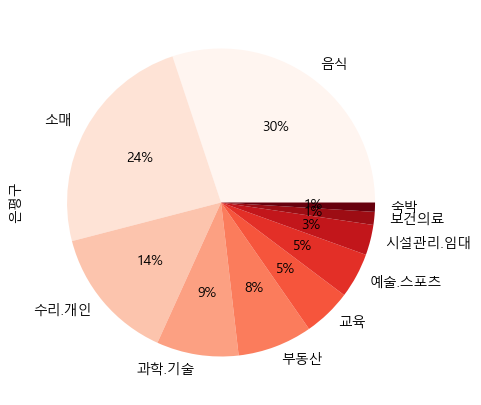

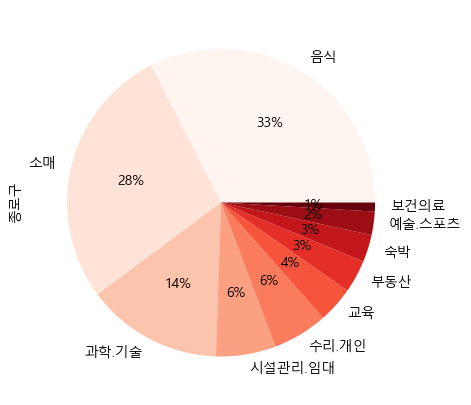

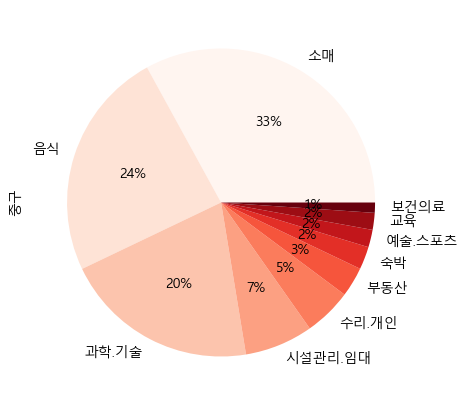

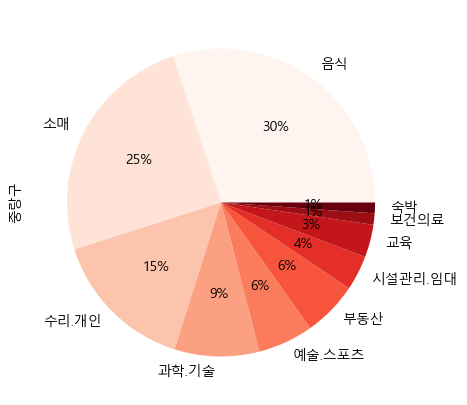

In [18]:
# 시각화 작업

# 시군구명 x에 저장
x=g_gu_big.index

# 서울지역의 시군구 for문으로 전부 시각화
for x in g_gu_big.index:
    g_gu_big.T[x].sort_values(ascending=False).plot(kind='pie',
                        legend=False,   
                        autopct='%0.f%%',figsize=[5, 5],colormap='Reds',
                        textprops={'size': 10}
                       )
    plt.show()

- 인구가 가장 많은 송파구는 음식이 25%로 가장 많았고 소매가 22%로 두번째 과학.기술이 18%로 세번째를 차지했다. 그에 반면 숙박 및 보건의료는 각각 1~2%로 가장 낮은 비율을 차지하고 있다
- 인구가 가장 적은 중구는 소매업이 33%로 가장 많았고 음식이 24%로 두번째 과학.기술이 20%로 세번째를 차지했다. 그에 반면 보건의료 및 교육은 각각 1~2%로 가장 낮은 비율을 차지하고 있다.
<br><br>
- 상권수가 가장 많은 강남구는 과학.기술이 30%로 가장 많았고 음식이 21%로 두번째 소매가 16%로 세번째를 차지했다. 그에 반면 숙박이 1%로 가장 낮은 비율을 차지하고있다.
- 상권수가 가장 적은 도봉구는 음식이 30%로 가장 많았고 소매가 25%로 두번째 수리.개인이 15%로 세번째를 차지했다. 그에 반면 숙박이 1%로 가장 낮은 비율을 차지하고있다.
<br><br>
- 서울의 전체적인 상권 비율은 음식이 대부분의 지역에서 가장 높았고, 강남구,금천구,서초구만 음식보다  과학.기술이 가장 높았다. 또한 중구는 유일하게 소매가 가장 높았다.
- 서울의 대부분의 지역에서 숙박과 보건.의료의 비율이 가장 낮았다.

# 가설 3 서울의 음식점중 한식이 가장 많을 것이다.

In [19]:
# 상권업종대분류명 음식 추출하기
seoul_food = market_seoul[market_seoul.상권업종대분류명=='음식']['상권업종중분류명'].value_counts().to_frame()
seoul_food

,count
상권업종중분류명,
한식,44973
기타 간이,26263
비알코올,20709
주점,17928
일식,5831
서양식,5812
중식,5121
동남아시아,1490
구내식당·뷔페,1015


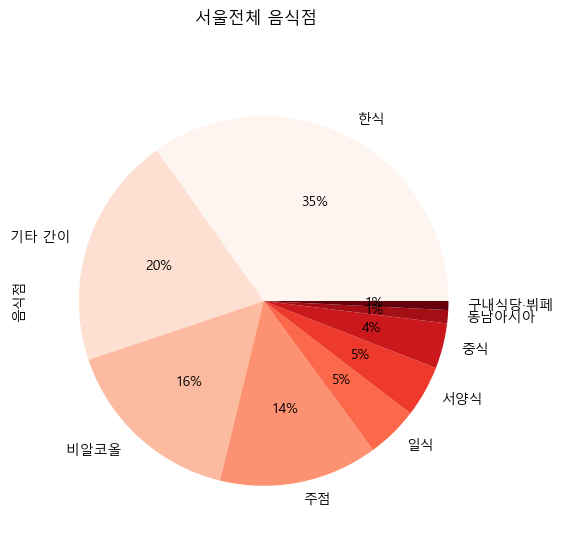

In [21]:
# 서울 전체 시각화 
seoul_food.plot(kind='pie',
                legend=False,
                subplots=True,
               autopct='%0.f%%',
               figsize=[6, 6],
               colormap='Reds',
               title='서울전체 음식점',
                ylabel='음식점'
               )
plt.show()

In [20]:
# 각 지역(구) 별로 음식상권 분석
seoul_gu_food=market_seoul[market_seoul.상권업종대분류명=='음식'][['시군구명','상권업종중분류명']].groupby('시군구명').value_counts(normalize=True).unstack()


In [22]:
# 특수기호가 있는 컬럼명 수정
seoul_gu_food.rename(columns={'구내식당·뷔페': '구내식당.뷔페'},inplace=True)

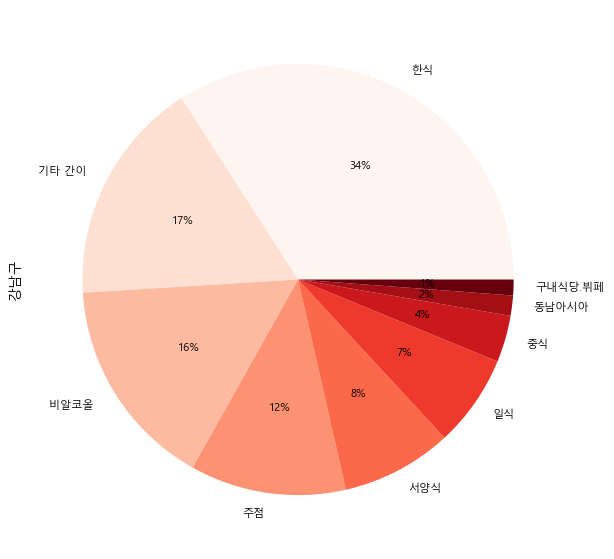

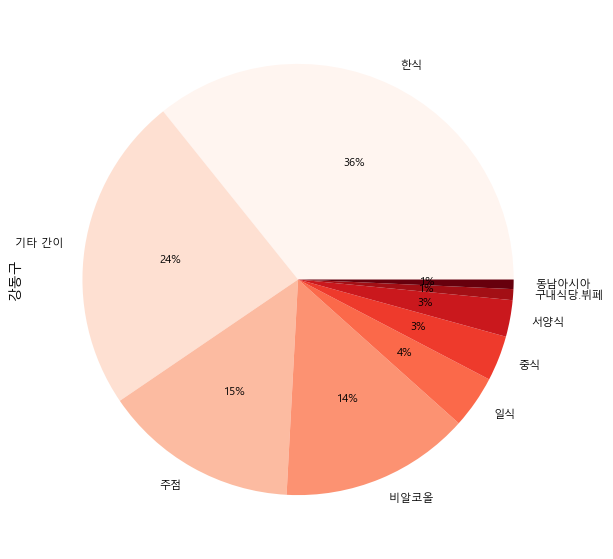

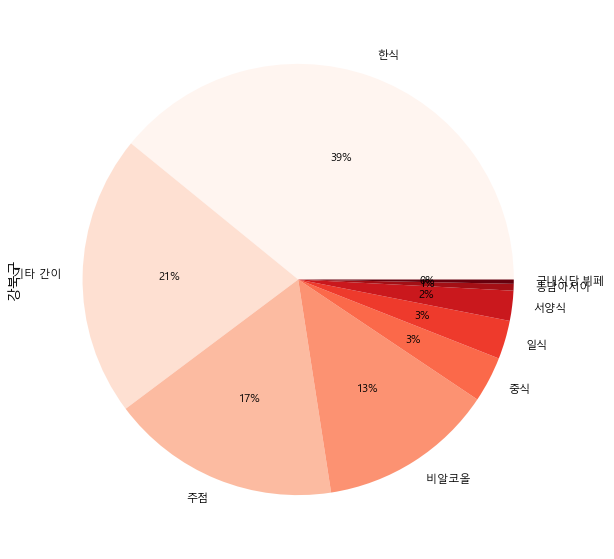

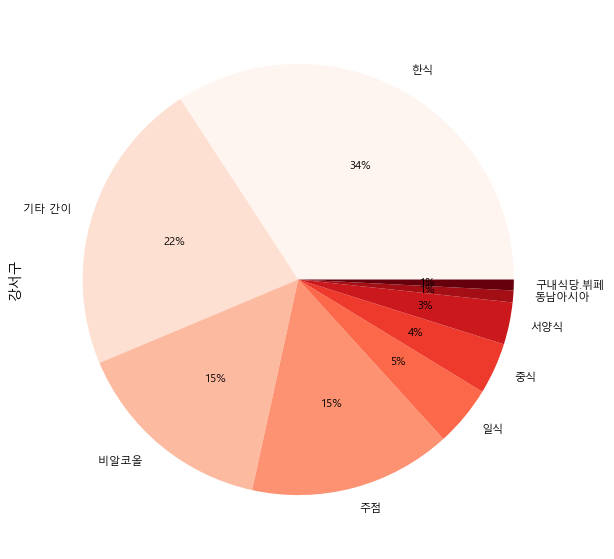

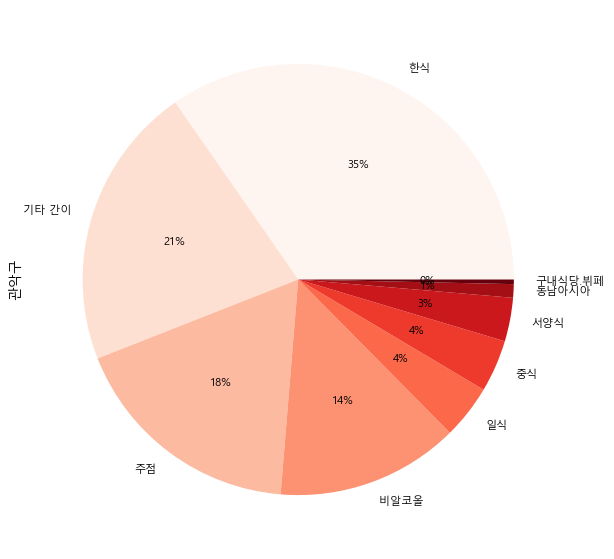

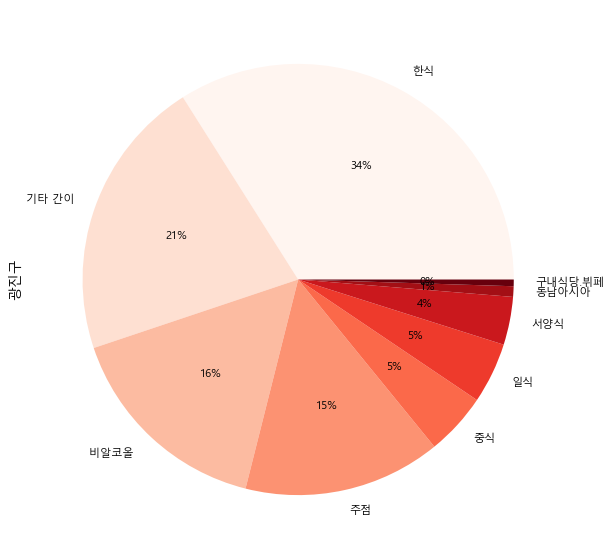

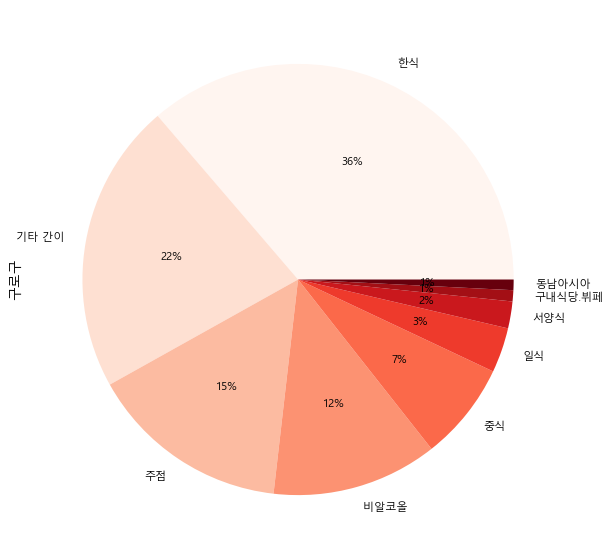

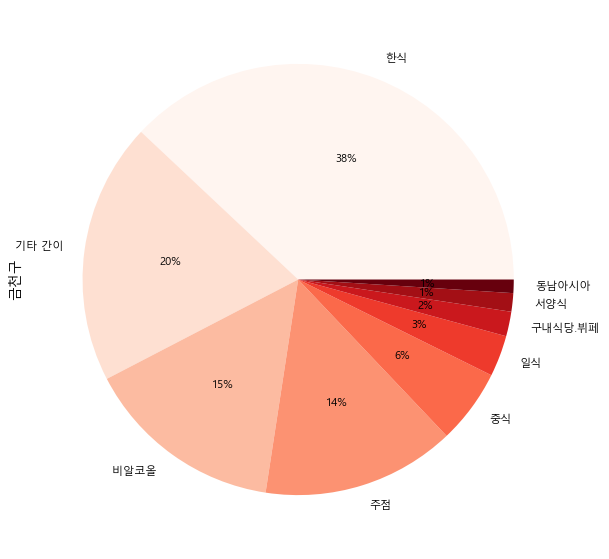

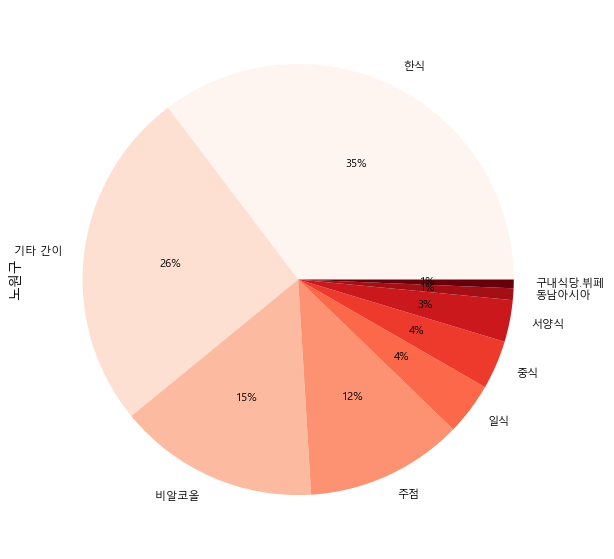

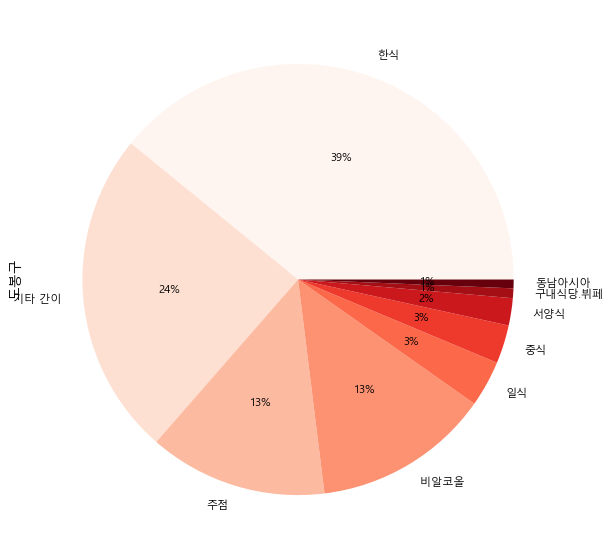

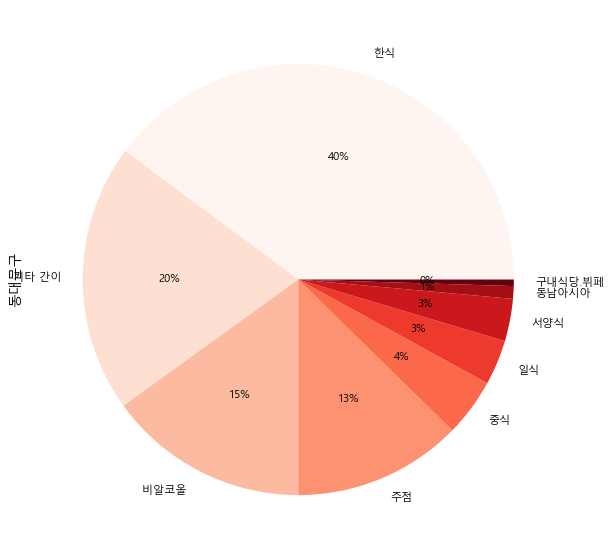

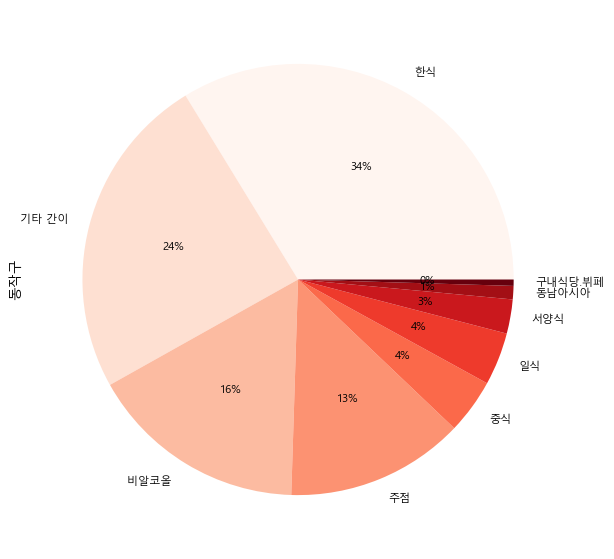

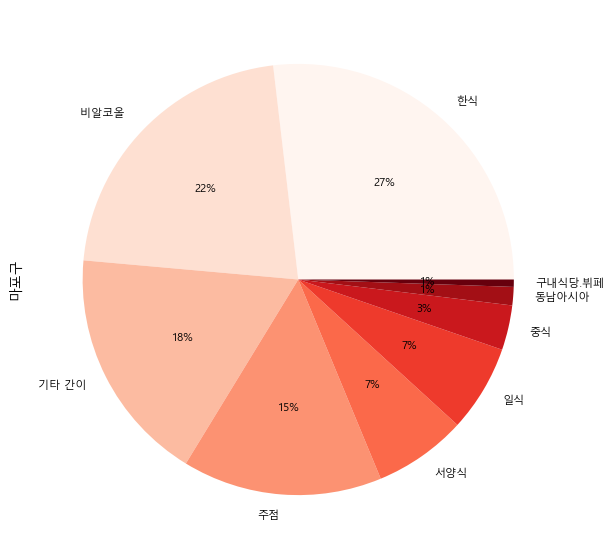

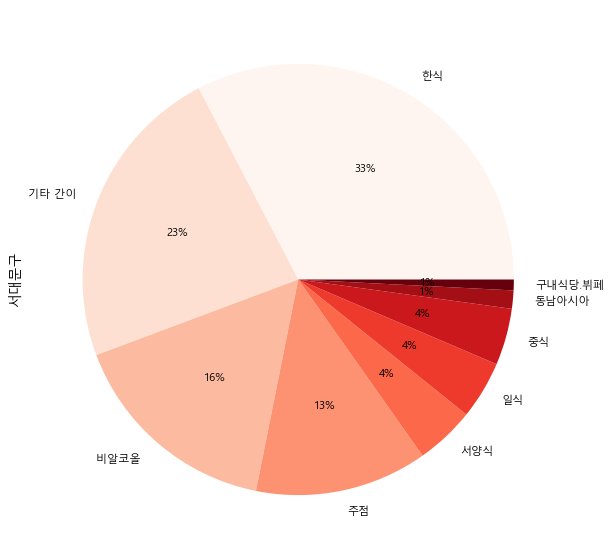

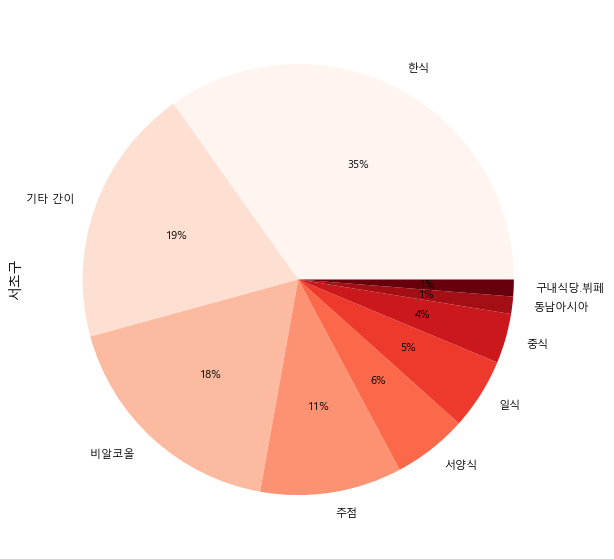

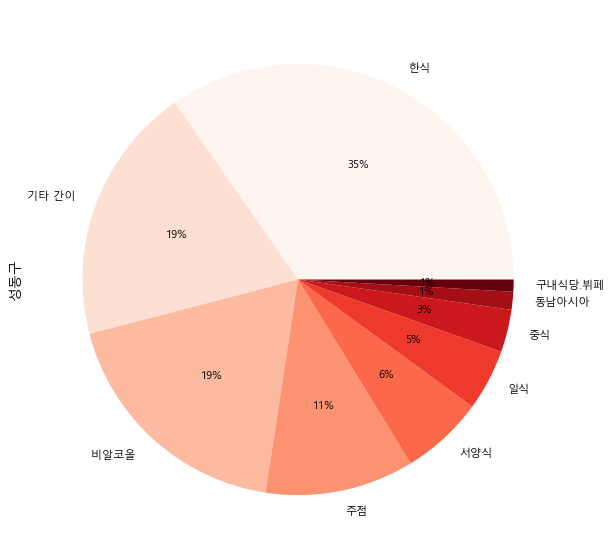

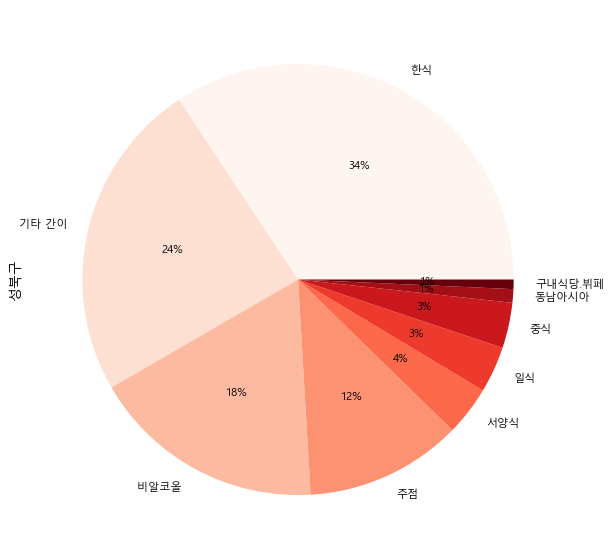

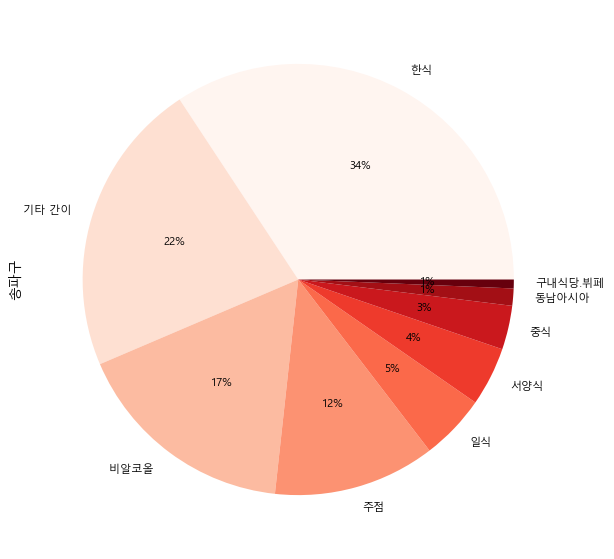

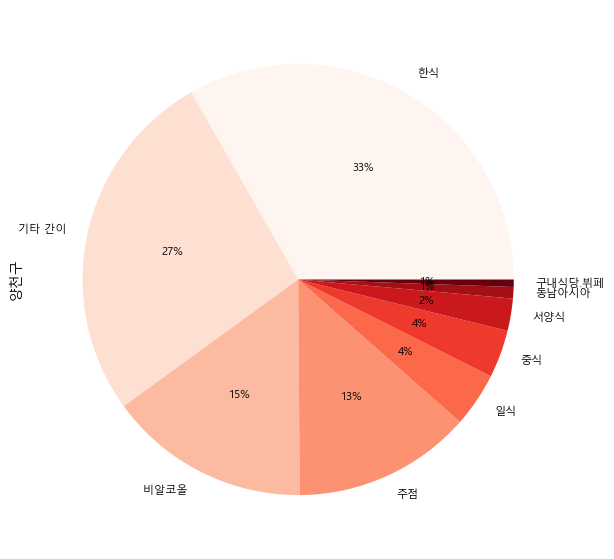

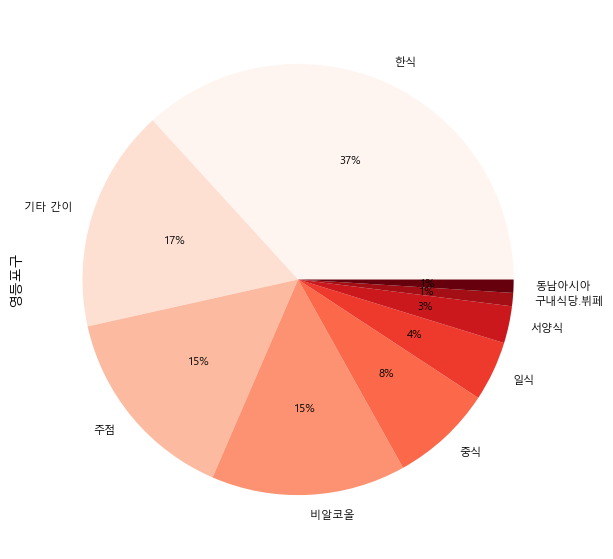

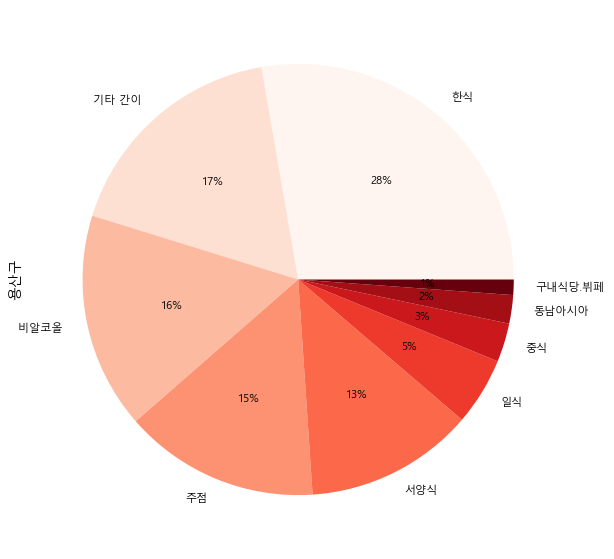

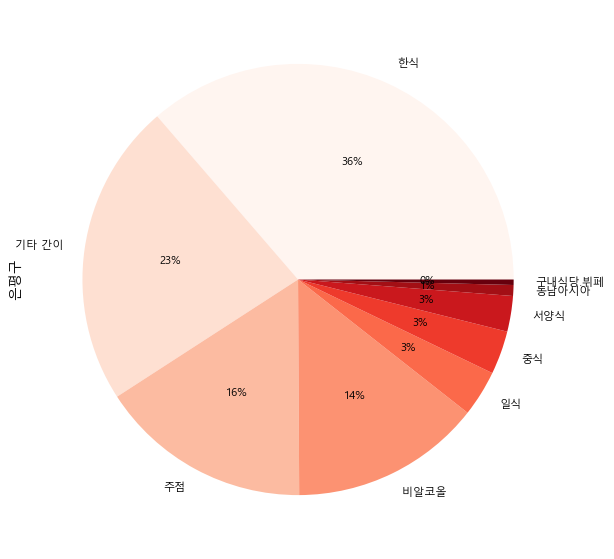

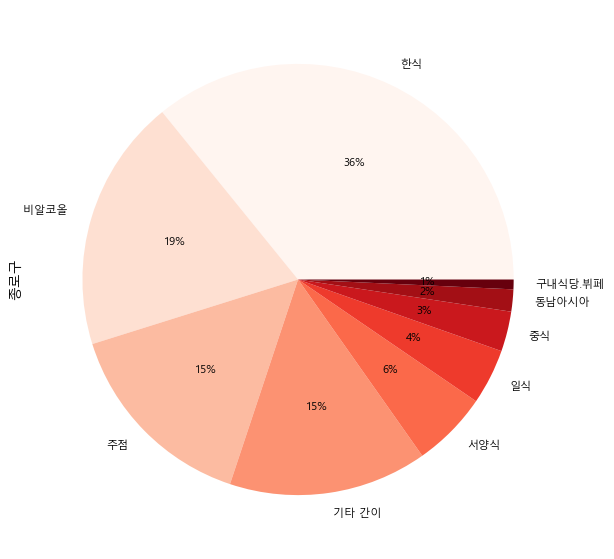

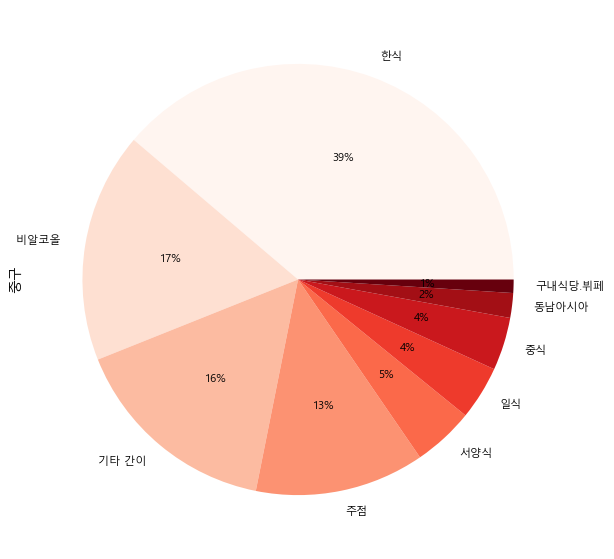

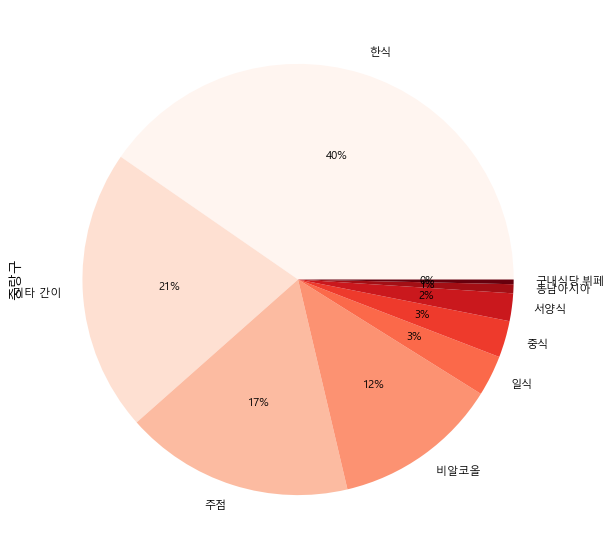

In [23]:
# 각 지역(구) 별로 시각화
for x in seoul_gu_food.index:
    seoul_gu_food.T[x].sort_values(ascending=False).plot(kind='pie',
                        legend=False,   
                        autopct='%0.f%%',figsize=[7, 7],colormap='Reds',
                        textprops={'size': 8}
                       )
    plt.show()

- 서울 모든 지역에서 한식이 가장 많은 비율을 차지했고 기타 간이, 주점, 비알코올이 나머지 대부분의 비율을 차지했다.

# 서울 각 지역별 상권이 많은 곳이 번화가, 상업지구일 것이다.

In [24]:
# 전처리 완료한 human_seoul파일
human_seoul_detail=pd.read_csv('human_seoul_detail.csv')
human_seoul_detail

,시군구명,읍면동명,계
0,종로구,청운효자동,11531
1,종로구,사직동,9104
2,종로구,삼청동,2301
3,종로구,부암동,9168
4,종로구,평창동,17520
...,...,...,...
421,강동구,성내제2동,22816
422,강동구,성내제3동,22624
423,강동구,길동,44809
424,강동구,둔촌제1동,64


In [25]:
# human_seoul_detail 읍면동명-> 행정동명 변경 
# 계 -> 인구수 변경
human_seoul_detail.rename(columns={'읍면동명': '행정동명', '계': '인구수'},inplace=True)
human_seoul_detail

,시군구명,행정동명,인구수
0,종로구,청운효자동,11531
1,종로구,사직동,9104
2,종로구,삼청동,2301
3,종로구,부암동,9168
4,종로구,평창동,17520
...,...,...,...
421,강동구,성내제2동,22816
422,강동구,성내제3동,22624
423,강동구,길동,44809
424,강동구,둔촌제1동,64


In [26]:
# 두개의 데이터프레임을 합치기 위한 human_seoul_detail.행정동명 사전작업 
def remove_character(string):
    if string.startswith('홍제제'):
        # '홍제'로 시작하는 경우에는 '제' 삭제하지 않음
        return string.replace('홍제제','홍제')
    elif string.startswith('제기'):
        # '제기'로 시작하는 경우에는 '제' 삭제하지 않음
        return string
    else:
        # 그 외의 경우 '제' 삭제
        return string.replace('제', '')

human_seoul_detail.행정동명 = human_seoul_detail.행정동명.apply(remove_character)

In [27]:
# human_seoul_detail '시군구명' 기준으로 그룹화
hsd=human_seoul_detail.groupby('시군구명').value_counts().to_frame()

In [28]:
# market_seoul 필요한 컬럼만 추출
mks=market_seoul[['시군구명','행정동명','상권업종대분류명']]

In [29]:
# market_seoul-> mks '시군구명' 기준으로 그룹화
g_mks=mks.groupby('시군구명').value_counts().unstack()

In [30]:
# mks의 결측치 0으로 변경
g_mks=g_mks.fillna(0)

In [31]:
#  mks의 타입 변경
g_mks = g_mks.astype(int)

In [32]:
# join함수를 사용해 g_mks와 hsd 결합
g_mks_hsd = g_mks.join(hsd)
g_mks_hsd

과학·기술   교육  보건의료  부동산   소매  수리·개인  숙박  시설관리·임대  예술·스포츠   음식   
시군구명 행정동명 인구수                                                                  
강남구  개포1동 6890       8    3     1   24   26     17   0        2       1    9  \
     개포2동 36103     63   61    21  155  111     63   4       17      28  132   
     개포3동 17109     48   17     9   43   76     25   0       10      11   65   
     개포4동 23457    427   73    15   72  267    138   6       87      53  219   
     논현1동 21371   1571  177   246  250  680    365  39      276     132  849   
...                ...  ...   ...  ...  ...    ...  ..      ...     ...  ...   
중랑구  상봉2동 20215     70   35    23   81  259    150  47       45     116  512   
     신내1동 38332    191   47     4   42  186    106   1       37      46  248   
     신내2동 19891     41   41     8   27  116     78   0       16      17  125   
     중화1동 19037     45   30     5   32  147     89   3       18       9   89   
     중화2동 24315     90   15    11   43  272    152   8       37      78  351   

                 count  
시군구명 행정동명 인구수           
강남구  개포1동 6890       1  
     개포2동 36103      1  
     개포3동 17109      1  
     개포4동 23457      1  
     논현1동 21371      1  
...                ...  
중랑구  상봉2동 20215      1  
     신내1동 38332      1  
     신내2동 19891      1  
     중화1동 19037      1  
     중화2동 24315      1  

[426 rows x 11 columns]

In [33]:
# 컬럼 count 삭제
g_mks_hsd.drop(columns=['count'],inplace=True)

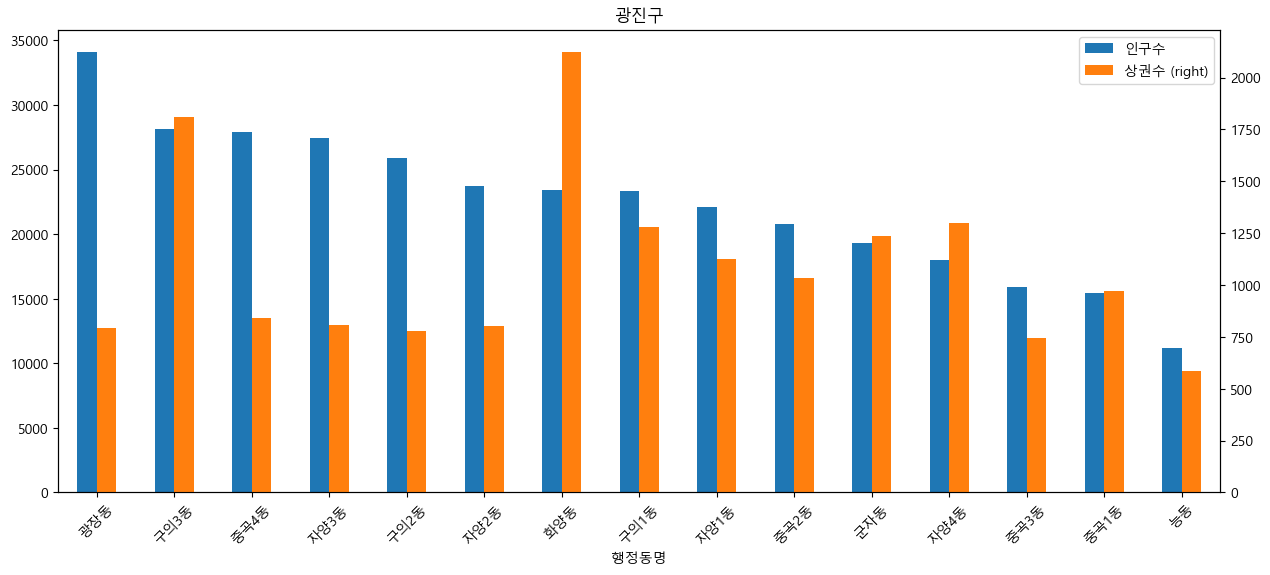

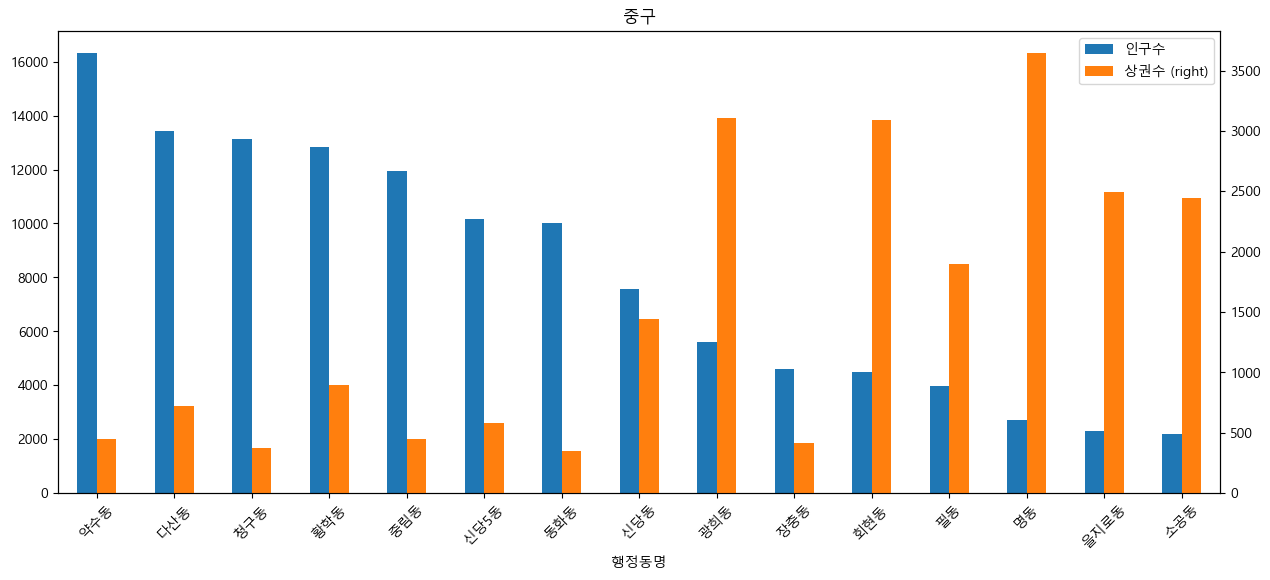

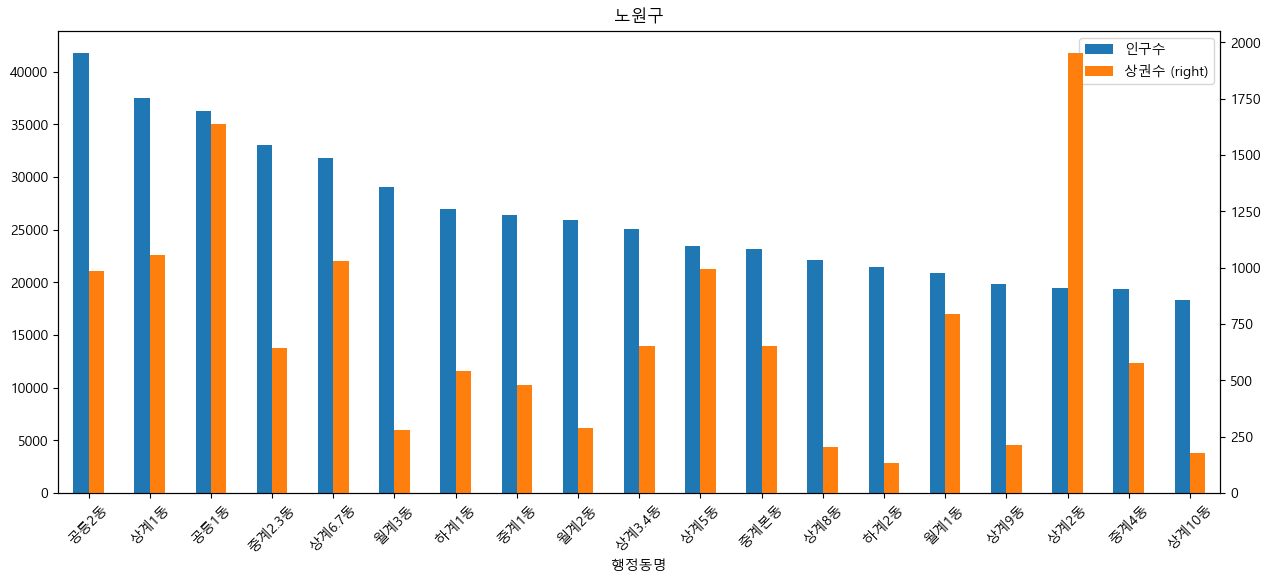

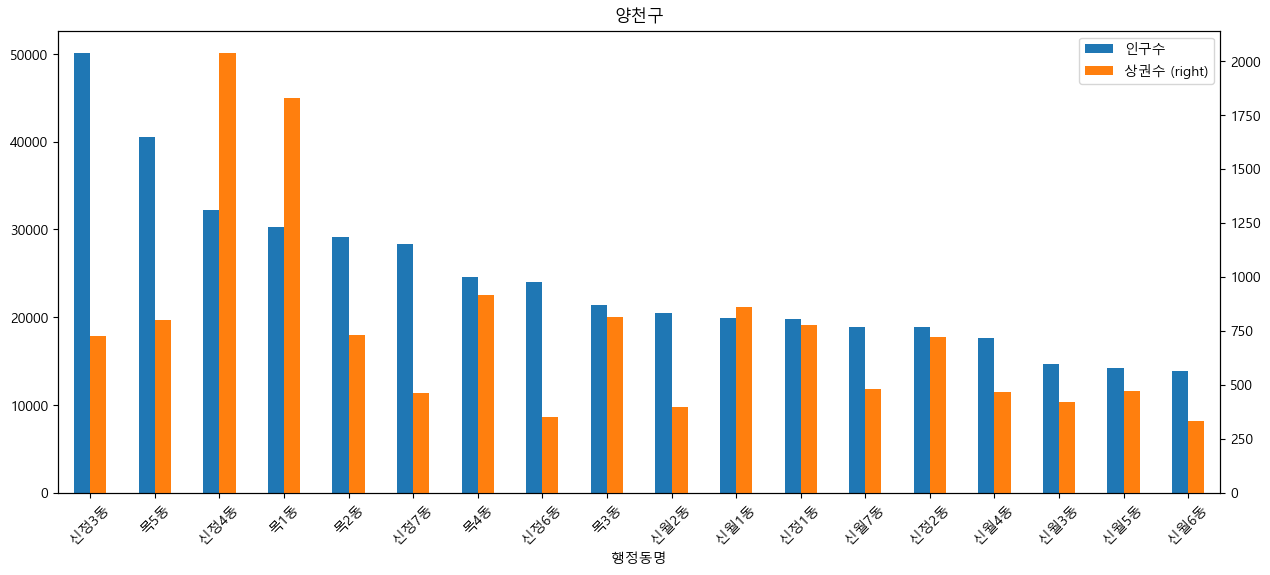

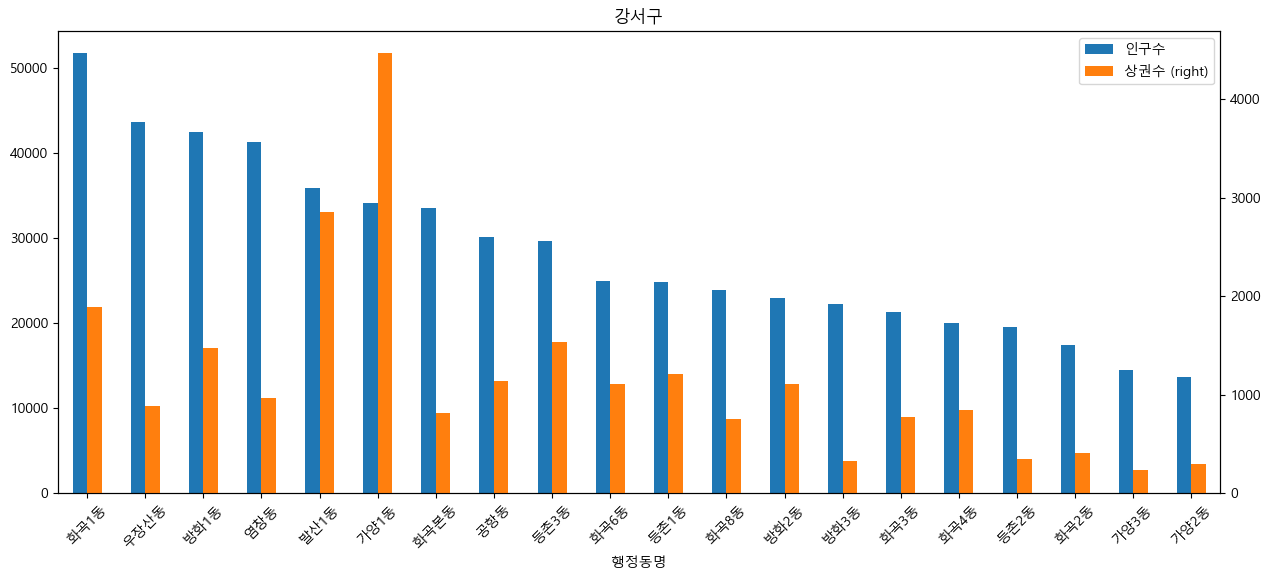

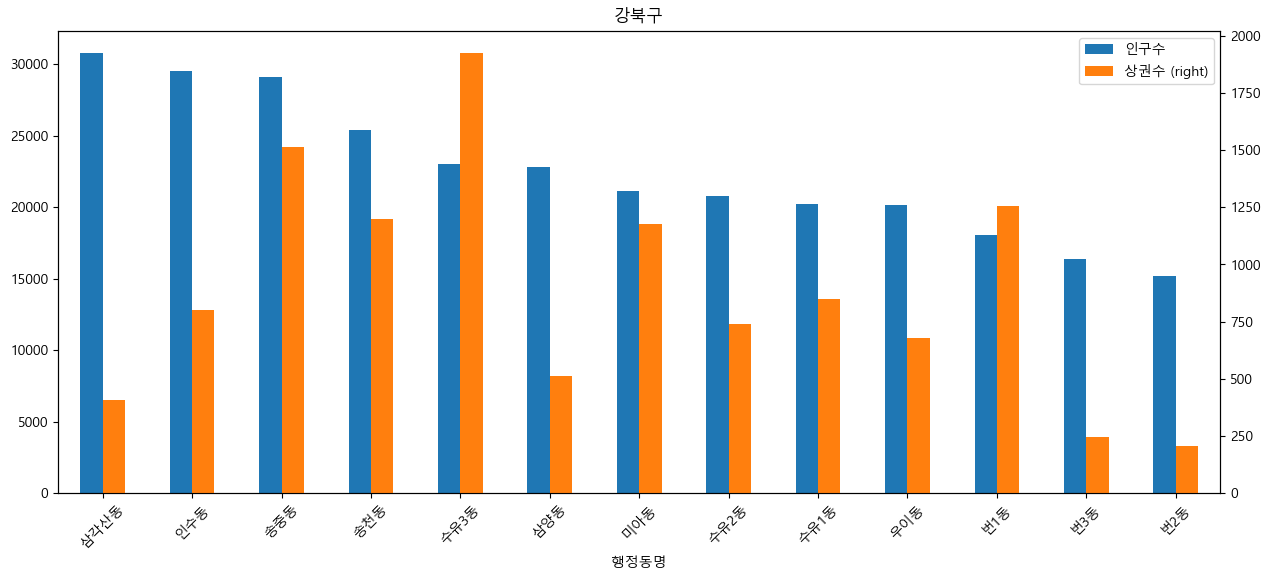

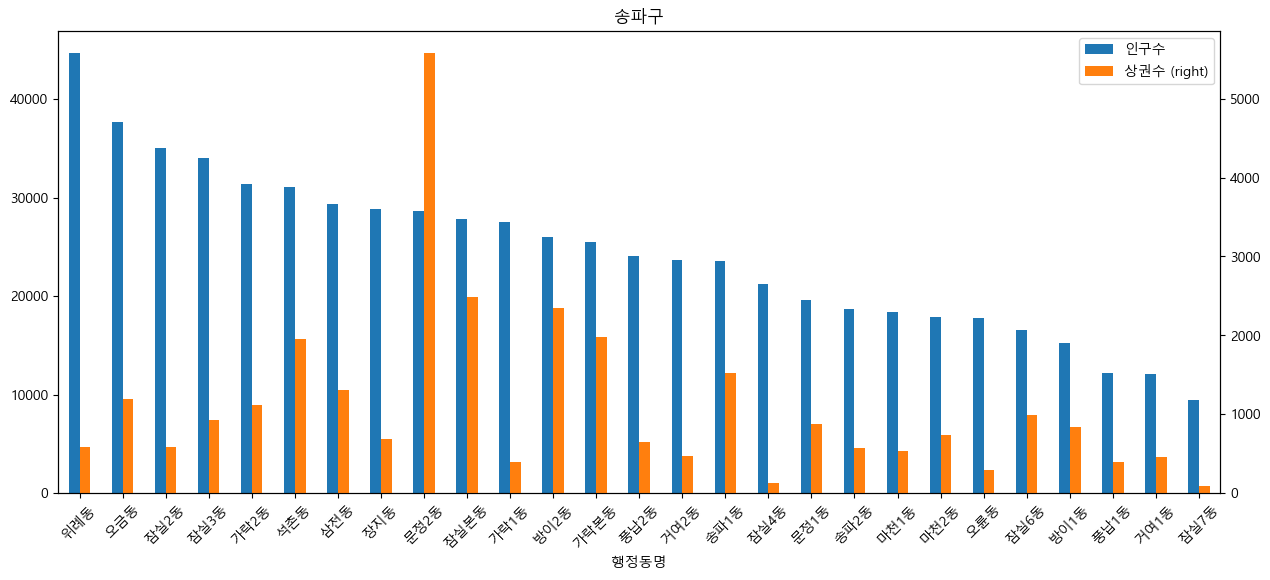

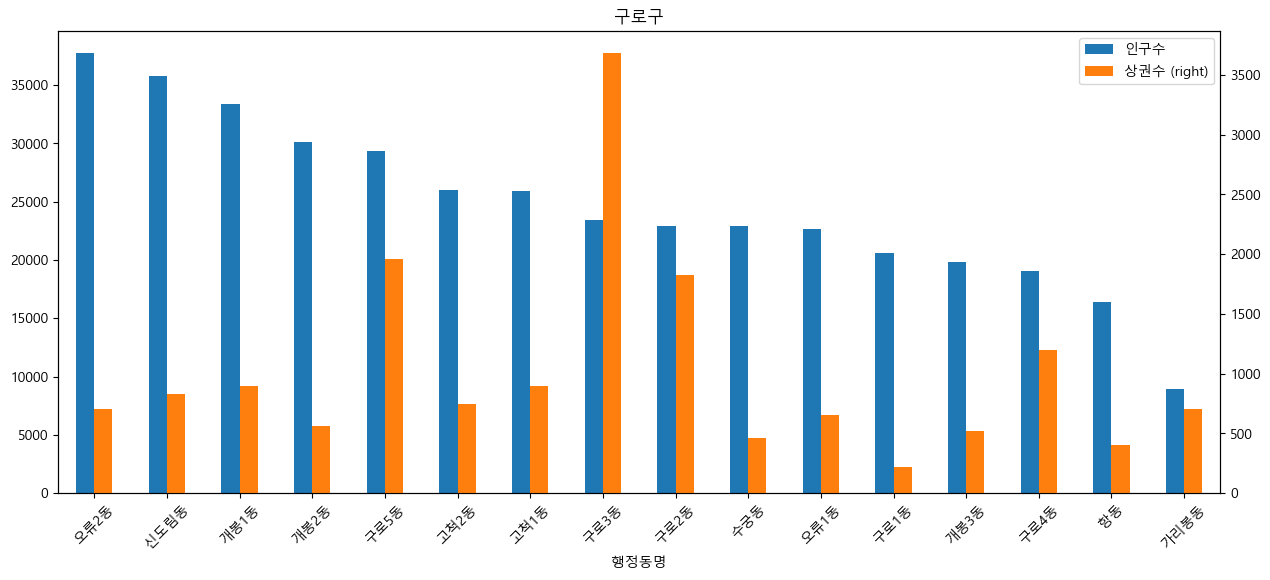

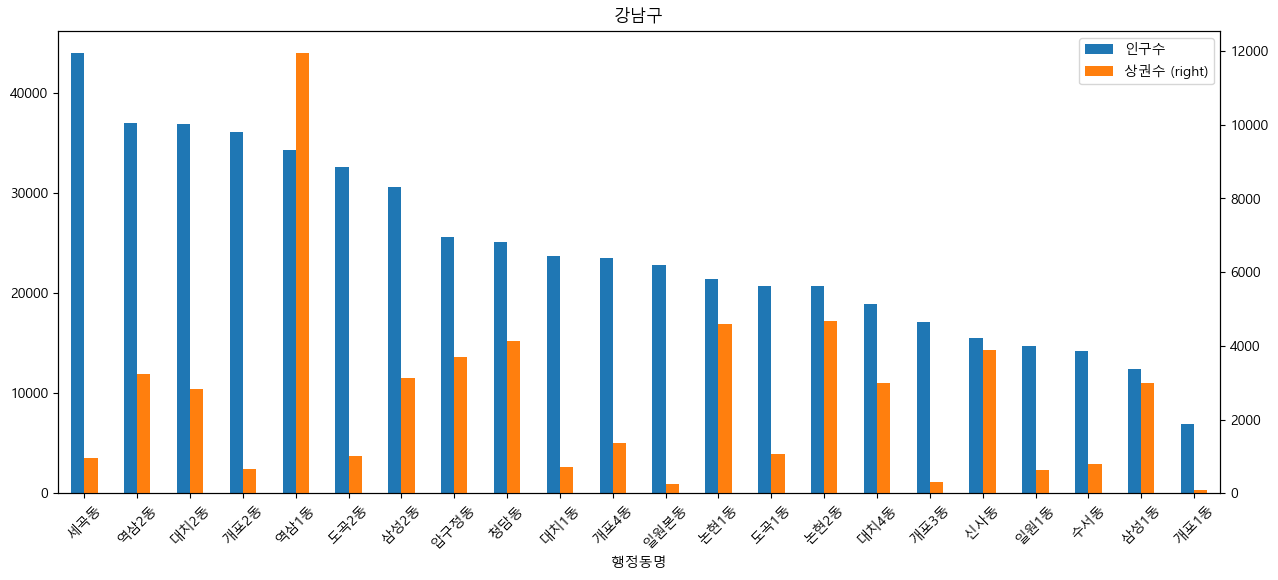

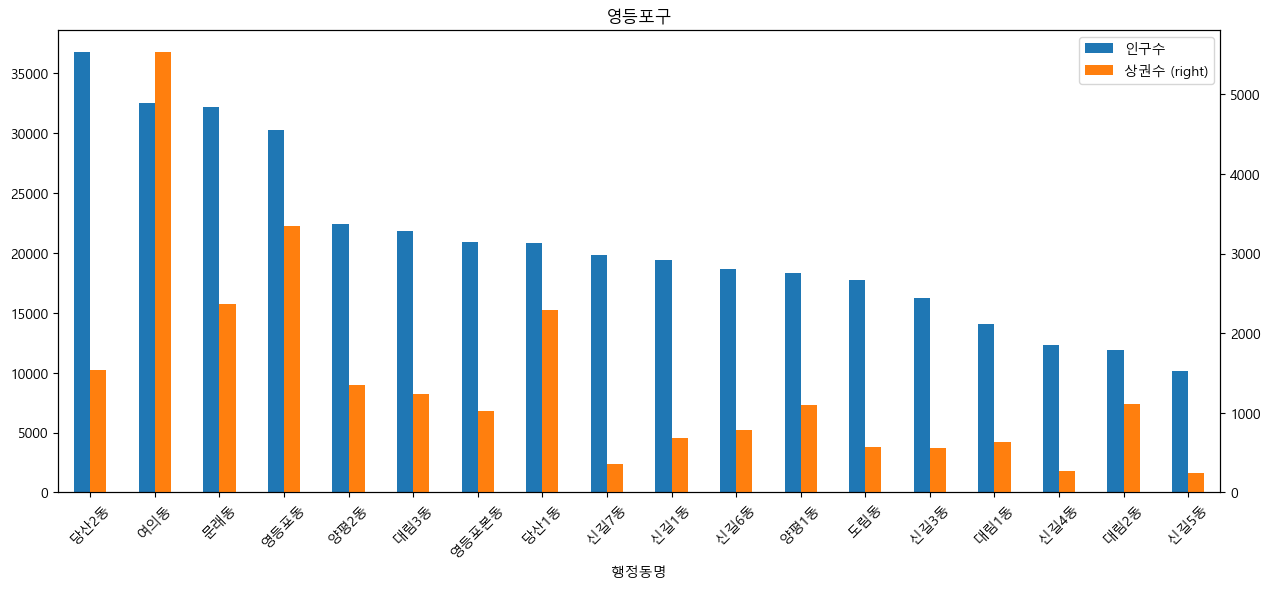

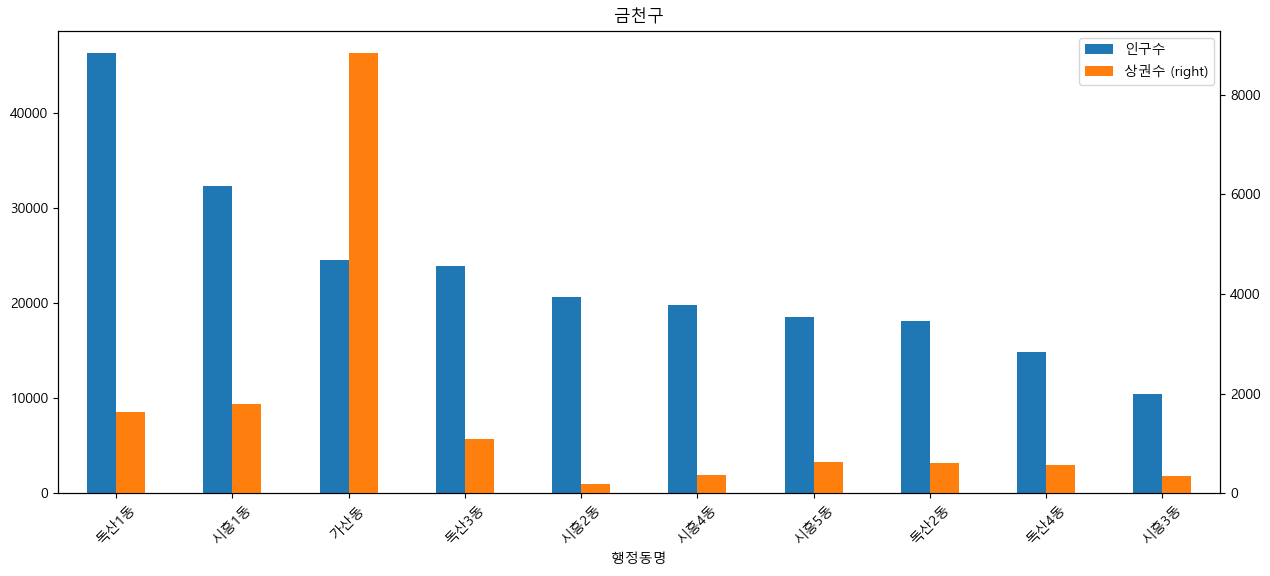

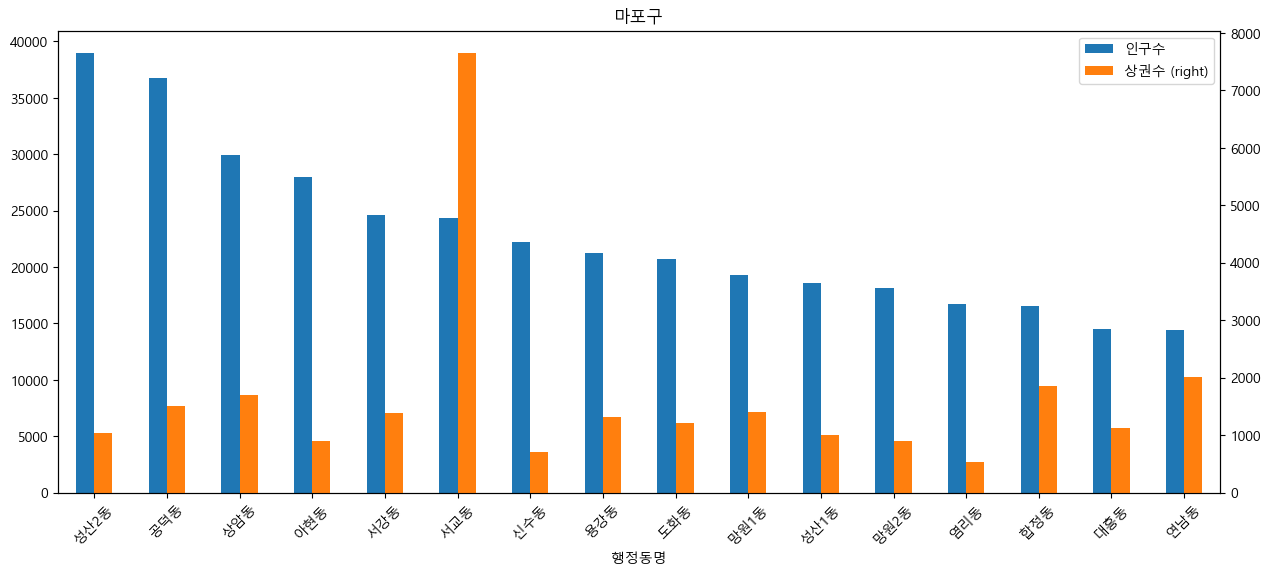

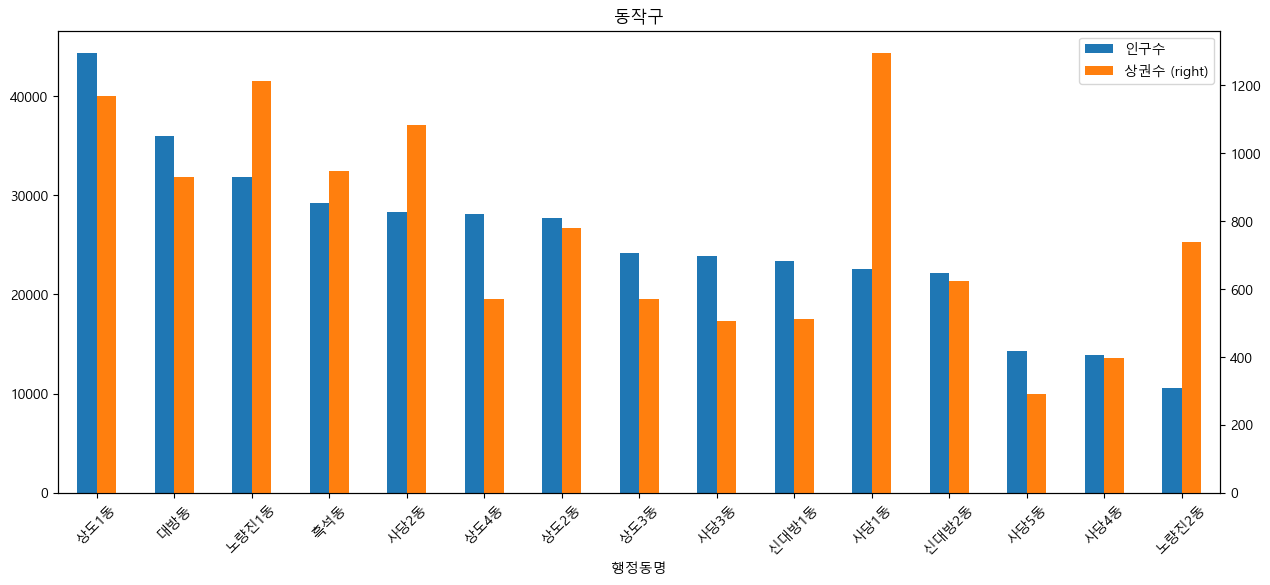

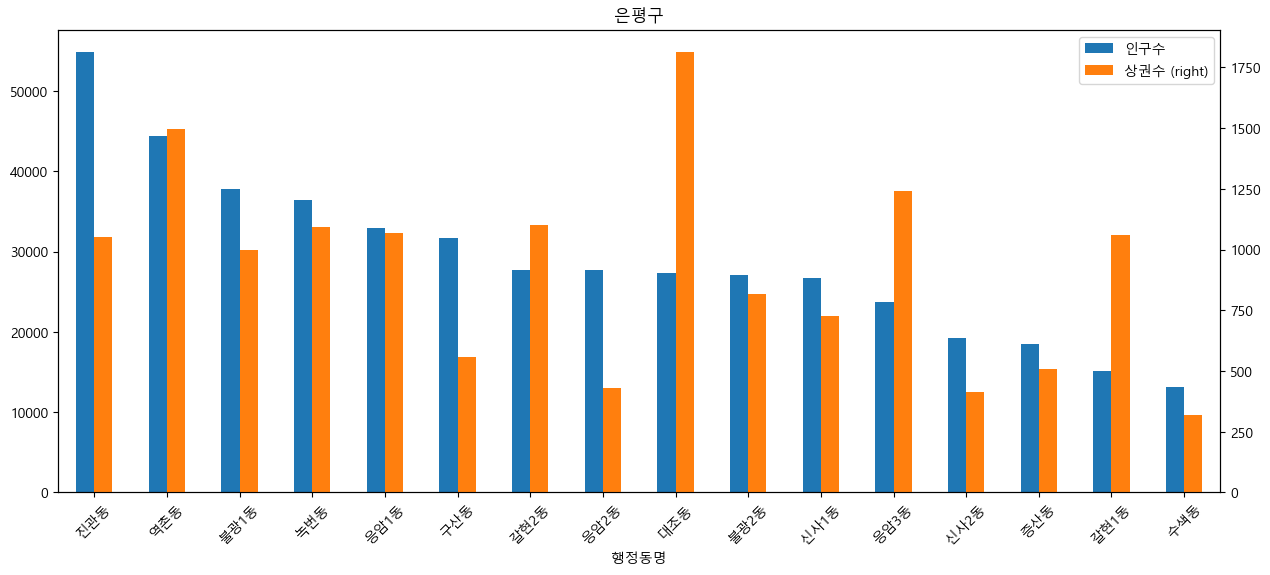

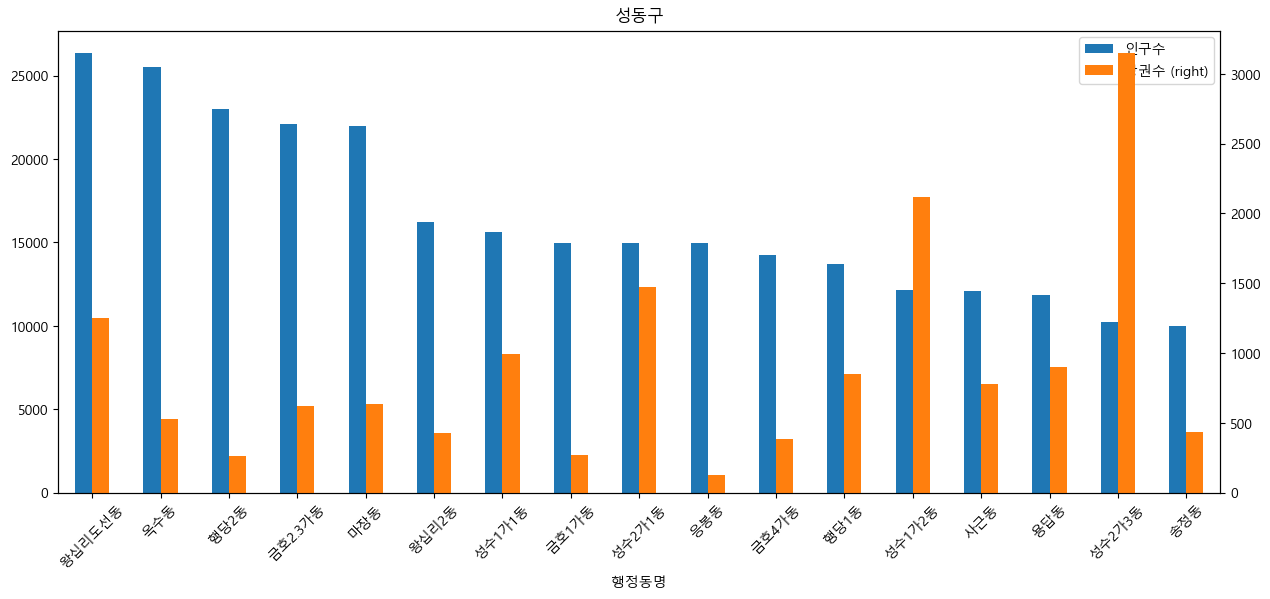

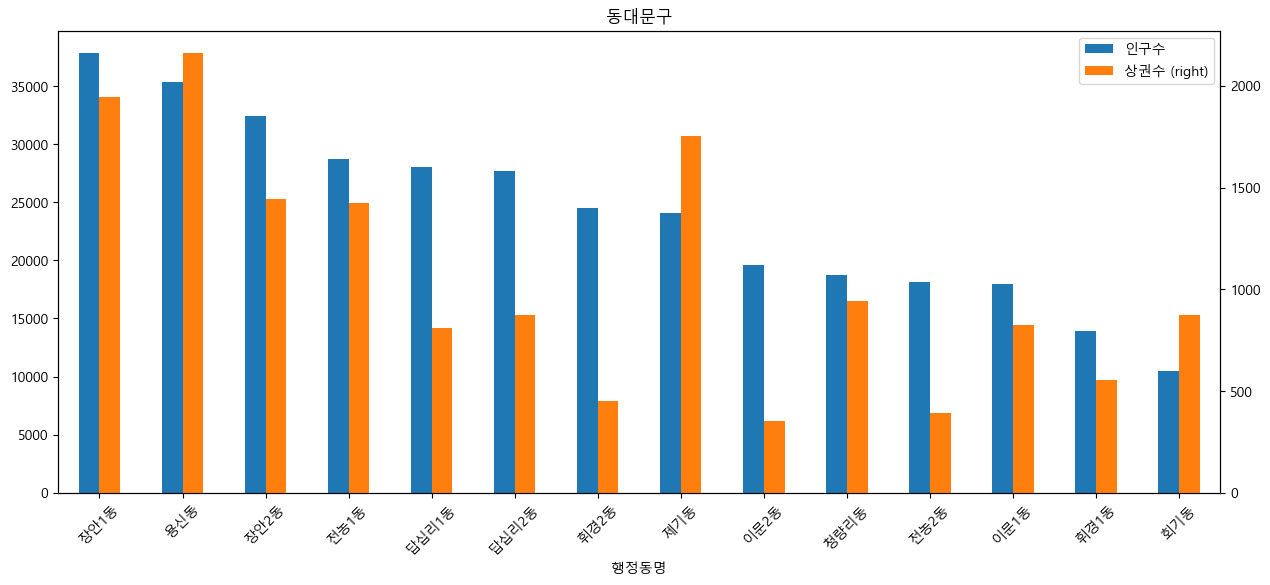

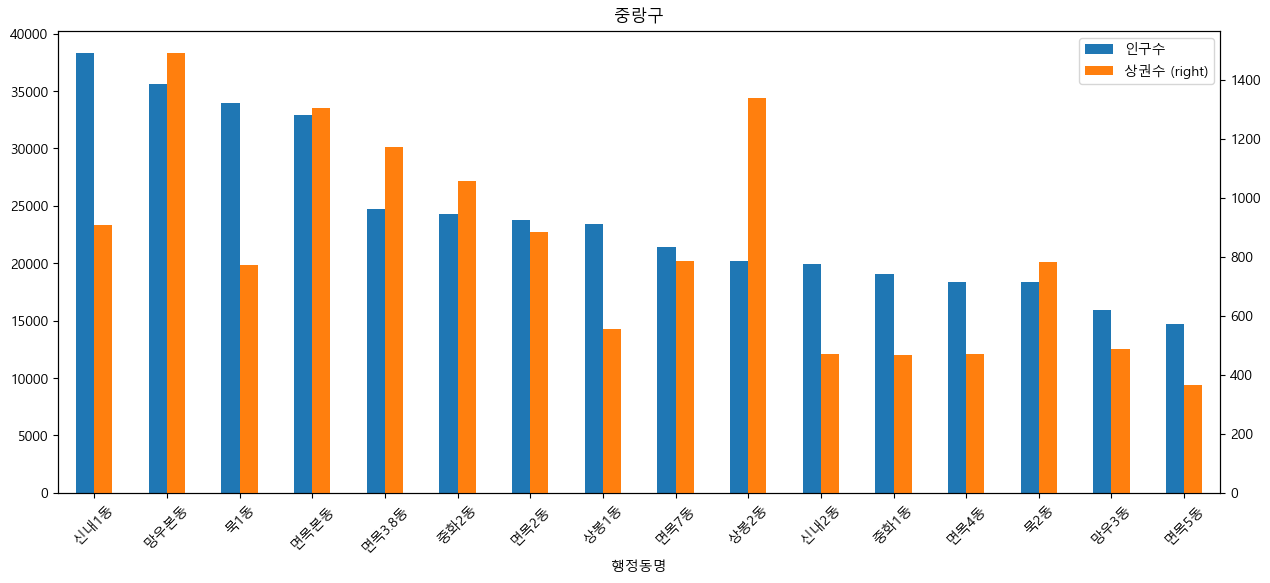

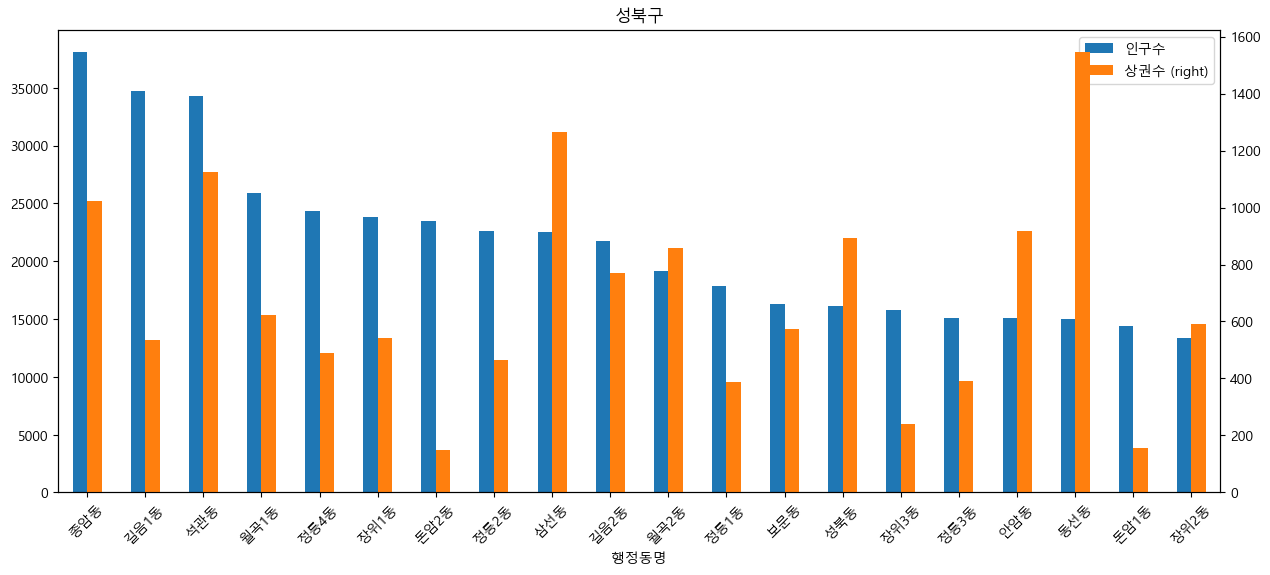

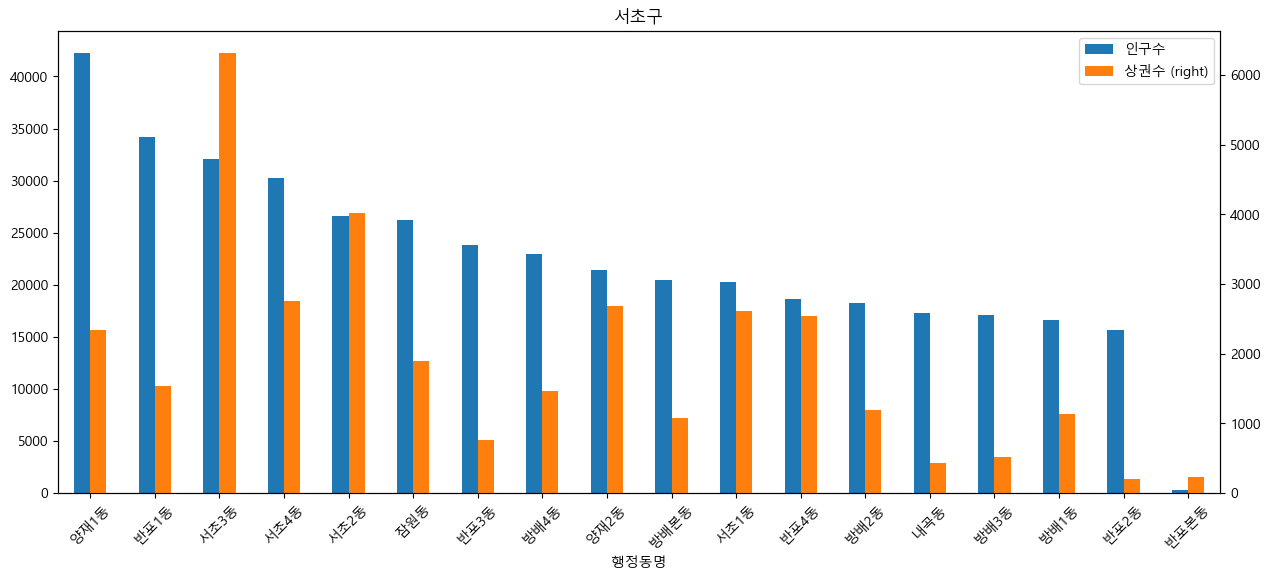

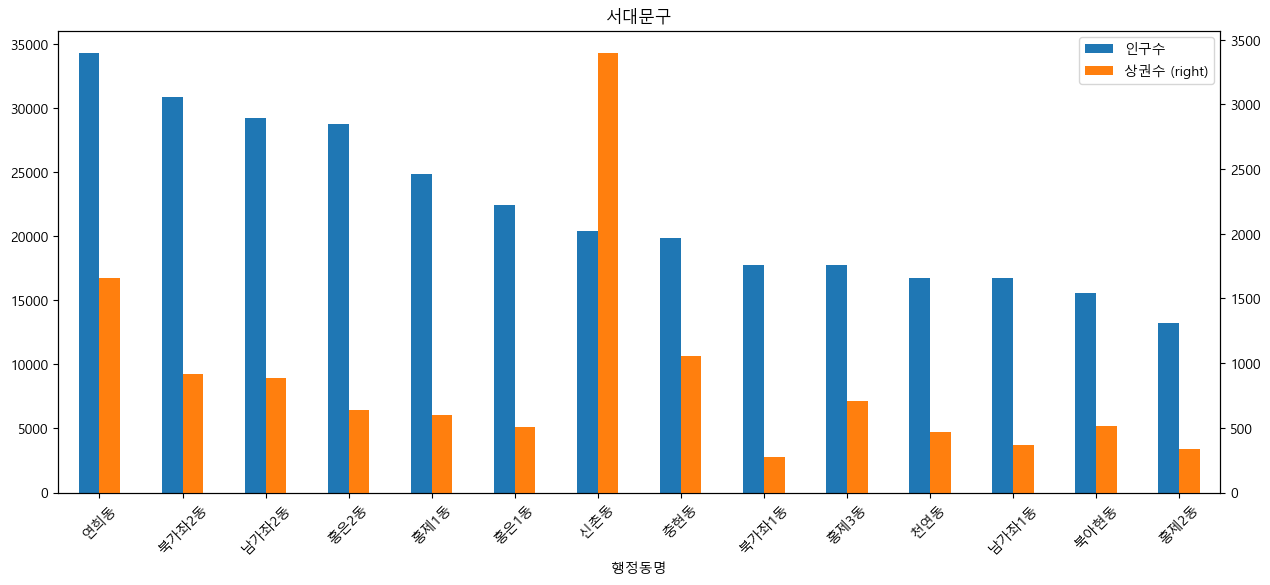

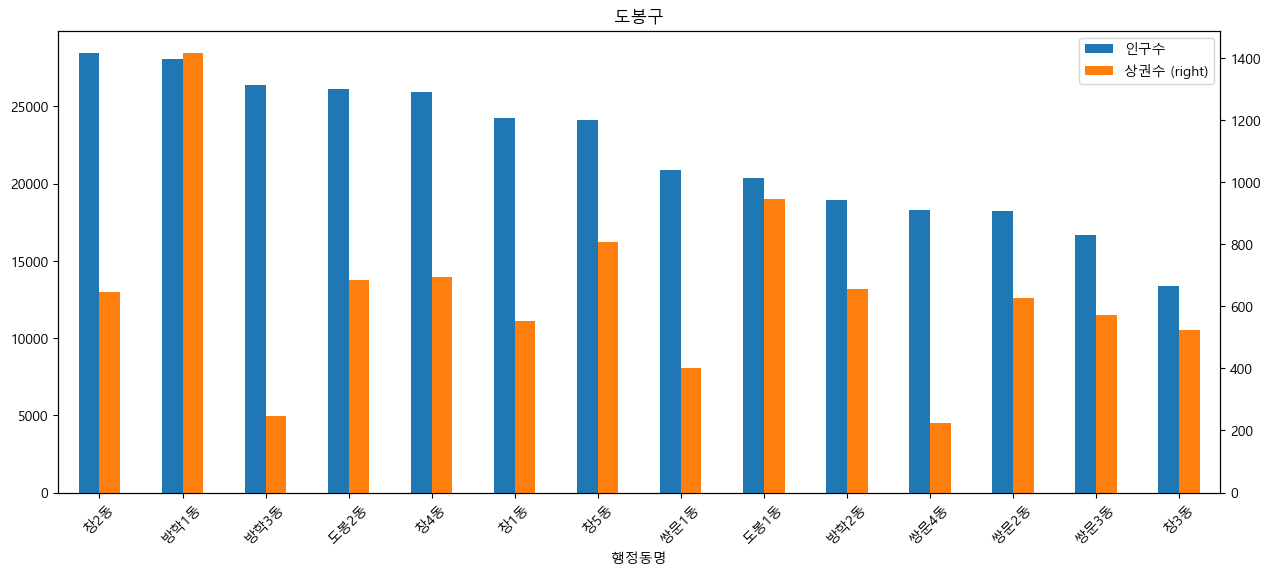

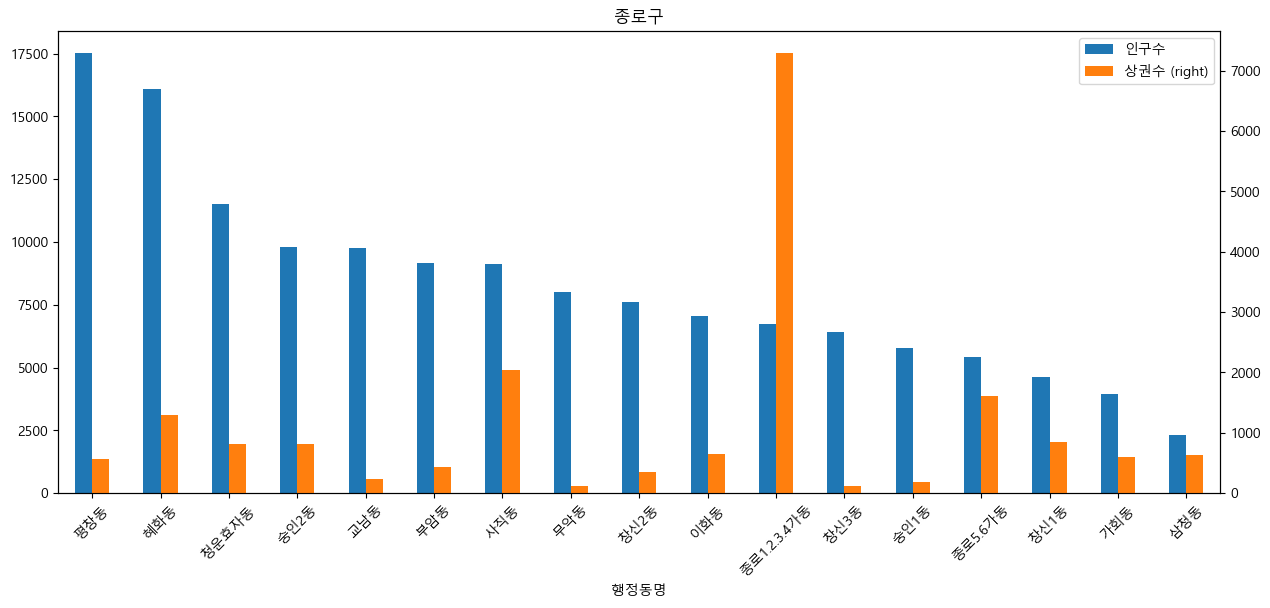

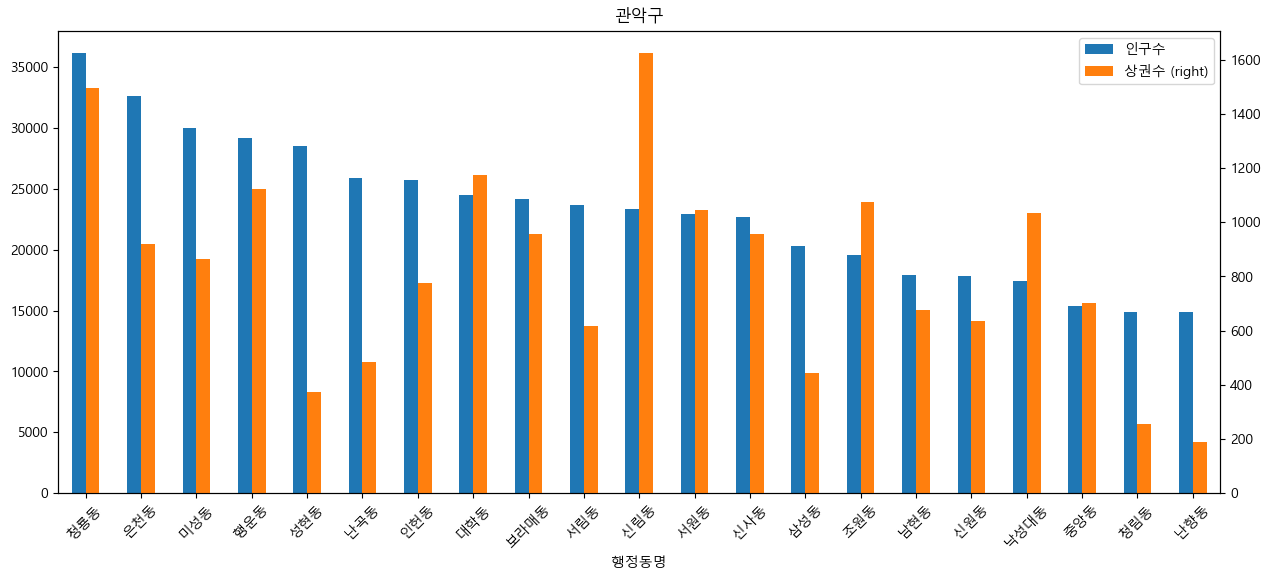

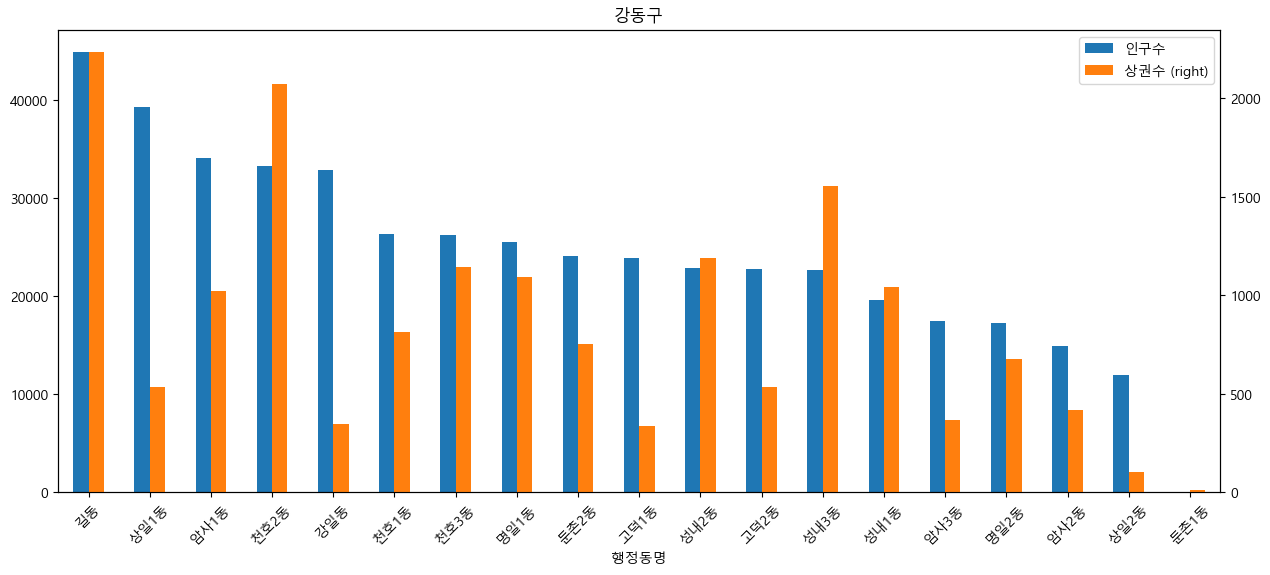

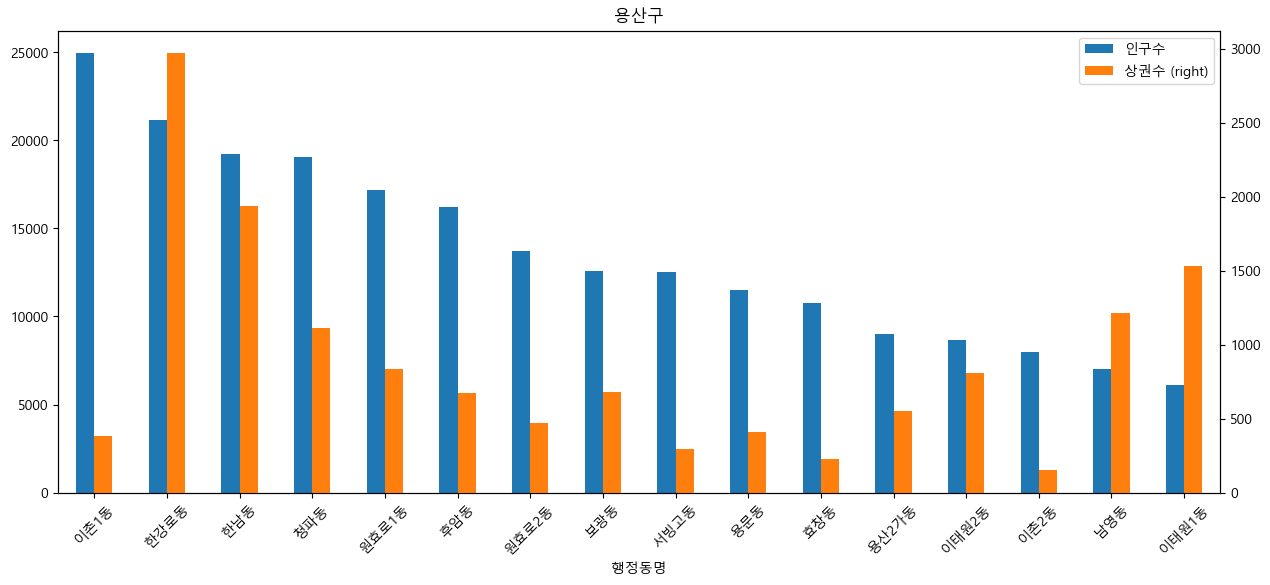

In [34]:
# '시군구명'의 구를 for문에서 쓰기 위해 unique함수를 사용, market_seoul에서 지역(구)만 seoul_gu에 저장
seoul_gu = market_seoul.시군구명.unique()
seoul_gu

# 서울 지역(구)의 각 행정동(동)별로 시각화
for index in seoul_gu:
    g_mks_hsd.loc[index].sort_values(by='인구수',ascending=False).sum(axis=1).to_frame().T.unstack().reset_index().rename(columns={0 : '상권수'}).drop(columns=['level_2']).plot(kind='bar',                                                                                                                                                                    x='행정동명',                                                                                                                                                                  secondary_y='상권수',
                   rot=45,                                                                                                                                                                        figsize=(15,6),                                                                                                                                                                title = index)
    plt.show()

- 서울의 각 지역별 상권이 가장 많은 곳은 번화가,상업지구다.
    - 정보 출처 : https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%EC%9D%98_%EC%A7%80%EC%97%AD_%EA%B5%AC%EC%A1%B0
                  https://namu.wiki/w/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C/%EC%83%81%EA%B6%8C